Assignment #1: Fully connected Neural network trained on Fashion MINST

In [1]:
# Data acquistion and processing libraries
import matplotlib.pyplot as plt
import numpy as np # Performing linear algebra ops.
import pandas as pd # CSV and data processing
from sklearn.model_selection import train_test_split

# Ai libraries
import tensorflow as tf
from tensorflow import keras

# Keras Callbacks for checkpoints
from keras.callbacks import ModelCheckpoint

# for use on macbook pro CPU
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [3]:
train_d = np.array(pd.read_csv(r'/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/A1/data/fashion-mnist_test.csv'), dtype = 'float32')
test_d = np.array(pd.read_csv(r'/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/A1/data/fashion-mnist_train.csv'), dtype = 'float32')
#testing data size
test_d.shape

(60000, 785)

In [4]:
# Parse training and testing data into images and labels arrays
# Specifics: Input data: [row, columns] -> each row is an image, each column a pixel (28*28 pixels)
# Normalize image values -> pixel data goes from 0->255 : /255 to normalize all values to between 0 and 1
# MAKE IN A FUNCTION -> NORMALIZE
train_images = train_d[:,1:]/255
train_labels = train_d[:,0]

test_images = test_d[:,1:]/255
test_labels = test_d[:,0]

In [5]:
# Divide training data into validation and train arrays for testing in the future
train_images, validate_images, train_labels, validate_labels = train_test_split(train_images, train_labels, test_size =0.2, random_state=12345,)

In [6]:
# Map label values to their database representation classes.

item_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


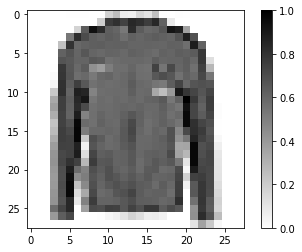

In [7]:
# Display some data to show it has been loaded
# Take one image from training_images, a 784 1d array of pixels
# Reshape the 784 pixels to a (28,28) matrix array and pyplots imshow to plot
sample_image = train_images[100, :].reshape((28, 28))
plt.figure()
plt.imshow(sample_image, cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
# plt.xlabel(item_name[train_labels[100,0]])
plt.show()

In [8]:
#Set up model variables
image_r = 28
image_c = 28
im_shape = (image_r, image_c, 1)
BATCH_SIZE = 32
EPOCHS = 10

#Prep data files for fitting
train_images = train_images.reshape(train_images.shape[0],image_r, image_c,1) 
validate_images = validate_images.reshape(validate_images.shape[0] ,image_r, image_c,1) 
test_images = test_images.reshape(test_images.shape[0], image_r, image_c,1)

In [9]:
# Layer setup
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding = 'same', activation = tf.nn.relu, input_shape = im_shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #Droup (0.2), #MAYBE -> helpful?
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [10]:
# Tensor board using ngork piping
logdir = r'logs\{}'.format('cnn_1layer') #create folder called logs
tbCallBack = tf.keras.callbacks.TensorBoard(
    log_dir = logdir,
    write_graph = True,
    write_grads = True,
    batch_size = BATCH_SIZE,
    histogram_freq = 1,
    write_images = True,
)
callbacks_list = [tbCallBack]

In [11]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [12]:
# checkpoint
filepath= '/Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list.append(checkpoint) 

In [13]:
cnn_model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, 
             verbose = 1,
             validation_data = (validate_images, validate_labels), callbacks =callbacks_list
             )

Train on 8000 samples, validate on 2000 samples


Epoch 1/10


  32/8000 [..............................] - ETA: 3:33 - loss: 2.2565 - acc: 0.1562

  96/8000 [..............................] - ETA: 1:14 - loss: 2.2281 - acc: 0.2188

 160/8000 [..............................] - ETA: 47s - loss: 2.1692 - acc: 0.2562 

 224/8000 [..............................] - ETA: 35s - loss: 2.1147 - acc: 0.2723

 288/8000 [>.............................] - ETA: 28s - loss: 2.0302 - acc: 0.3299

 352/8000 [>.............................] - ETA: 24s - loss: 1.9296 - acc: 0.3920

 416/8000 [>.............................] - ETA: 21s - loss: 1.8658 - acc: 0.4062

 480/8000 [>.............................] - ETA: 19s - loss: 1.7630 - acc: 0.4292

 544/8000 [=>............................] - ETA: 17s - loss: 1.6964 - acc: 0.4393

 608/8000 [=>............................] - ETA: 16s - loss: 1.6385 - acc: 0.4507

 672/8000 [=>............................] - ETA: 15s - loss: 1.5775 - acc: 0.4568

 736/8000 [=>............................] - ETA: 14s - loss: 1.5397 - acc: 0.4592

 800/8000 [==>...........................] - ETA: 13s - loss: 1.4865 - acc: 0.4688

 864/8000 [==>...........................] - ETA: 12s - loss: 1.4307 - acc: 0.4884

 928/8000 [==>...........................] - ETA: 12s - loss: 1.4000 - acc: 0.5022

 992/8000 [==>...........................] - ETA: 11s - loss: 1.3842 - acc: 0.5091

1056/8000 [==>...........................] - ETA: 11s - loss: 1.3457 - acc: 0.5246

1120/8000 [===>..........................] - ETA: 10s - loss: 1.3250 - acc: 0.5312

1184/8000 [===>..........................] - ETA: 10s - loss: 1.2907 - acc: 0.5422

1248/8000 [===>..........................] - ETA: 10s - loss: 1.2610 - acc: 0.5537

1312/8000 [===>..........................] - ETA: 9s - loss: 1.2445 - acc: 0.5625 

1376/8000 [====>.........................] - ETA: 9s - loss: 1.2194 - acc: 0.5683

1440/8000 [====>.........................] - ETA: 9s - loss: 1.1986 - acc: 0.5771

1504/8000 [====>.........................] - ETA: 9s - loss: 1.1823 - acc: 0.5805

1568/8000 [====>.........................] - ETA: 8s - loss: 1.1648 - acc: 0.5874

1664/8000 [=====>........................] - ETA: 8s - loss: 1.1350 - acc: 0.5950

1728/8000 [=====>........................] - ETA: 8s - loss: 1.1166 - acc: 0.6019

1792/8000 [=====>........................] - ETA: 8s - loss: 1.1045 - acc: 0.6066

1856/8000 [=====>........................] - ETA: 7s - loss: 1.0896 - acc: 0.6131

1920/8000 [======>.......................] - ETA: 7s - loss: 1.0759 - acc: 0.6193

1984/8000 [======>.......................] - ETA: 7s - loss: 1.0651 - acc: 0.6230

2048/8000 [======>.......................] - ETA: 7s - loss: 1.0475 - acc: 0.6289

2112/8000 [======>.......................] - ETA: 7s - loss: 1.0390 - acc: 0.6326

2176/8000 [=======>......................] - ETA: 7s - loss: 1.0284 - acc: 0.6369

2240/8000 [=======>......................] - ETA: 6s - loss: 1.0166 - acc: 0.6415

2304/8000 [=======>......................] - ETA: 6s - loss: 1.0082 - acc: 0.6428

2368/8000 [=======>......................] - ETA: 6s - loss: 1.0028 - acc: 0.6436

2432/8000 [========>.....................] - ETA: 6s - loss: 0.9899 - acc: 0.6488

2496/8000 [========>.....................] - ETA: 6s - loss: 0.9782 - acc: 0.6530

2560/8000 [========>.....................] - ETA: 6s - loss: 0.9689 - acc: 0.6570

2624/8000 [========>.....................] - ETA: 6s - loss: 0.9583 - acc: 0.6612

2688/8000 [=========>....................] - ETA: 6s - loss: 0.9545 - acc: 0.6626

2752/8000 [=========>....................] - ETA: 5s - loss: 0.9476 - acc: 0.6650

2848/8000 [=========>....................] - ETA: 5s - loss: 0.9442 - acc: 0.6671

2912/8000 [=========>....................] - ETA: 5s - loss: 0.9410 - acc: 0.6686

3008/8000 [==========>...................] - ETA: 5s - loss: 0.9317 - acc: 0.6712

3072/8000 [==========>...................] - ETA: 5s - loss: 0.9271 - acc: 0.6725

3136/8000 [==========>...................] - ETA: 5s - loss: 0.9177 - acc: 0.6760

3200/8000 [===========>..................] - ETA: 5s - loss: 0.9112 - acc: 0.6784

3264/8000 [===========>..................] - ETA: 5s - loss: 0.9040 - acc: 0.6811

3328/8000 [===========>..................] - ETA: 5s - loss: 0.8948 - acc: 0.6839

3392/8000 [===========>..................] - ETA: 4s - loss: 0.8874 - acc: 0.6866

3456/8000 [===========>..................] - ETA: 4s - loss: 0.8855 - acc: 0.6869

3520/8000 [============>.................] - ETA: 4s - loss: 0.8797 - acc: 0.6886

3584/8000 [============>.................] - ETA: 4s - loss: 0.8741 - acc: 0.6897

3648/8000 [============>.................] - ETA: 4s - loss: 0.8685 - acc: 0.6919

3712/8000 [============>.................] - ETA: 4s - loss: 0.8627 - acc: 0.6937

3776/8000 [=============>................] - ETA: 4s - loss: 0.8569 - acc: 0.6947

3840/8000 [=============>................] - ETA: 4s - loss: 0.8531 - acc: 0.6951

3904/8000 [=============>................] - ETA: 4s - loss: 0.8484 - acc: 0.6965

3968/8000 [=============>................] - ETA: 4s - loss: 0.8440 - acc: 0.6971

4032/8000 [==============>...............] - ETA: 4s - loss: 0.8393 - acc: 0.6992

4096/8000 [==============>...............] - ETA: 4s - loss: 0.8340 - acc: 0.7007

4160/8000 [==============>...............] - ETA: 3s - loss: 0.8288 - acc: 0.7024

4224/8000 [==============>...............] - ETA: 3s - loss: 0.8257 - acc: 0.7034

4288/8000 [===============>..............] - ETA: 3s - loss: 0.8217 - acc: 0.7041

4352/8000 [===============>..............] - ETA: 3s - loss: 0.8168 - acc: 0.7054

4416/8000 [===============>..............] - ETA: 3s - loss: 0.8110 - acc: 0.7072

4480/8000 [===============>..............] - ETA: 3s - loss: 0.8054 - acc: 0.7092

4544/8000 [================>.............] - ETA: 3s - loss: 0.8035 - acc: 0.7097

4608/8000 [================>.............] - ETA: 3s - loss: 0.7990 - acc: 0.7114

4672/8000 [================>.............] - ETA: 3s - loss: 0.7945 - acc: 0.7128

4736/8000 [================>.............] - ETA: 3s - loss: 0.7938 - acc: 0.7122

4800/8000 [=================>............] - ETA: 3s - loss: 0.7897 - acc: 0.7140

4832/8000 [=================>............] - ETA: 3s - loss: 0.7889 - acc: 0.7146

4864/8000 [=================>............] - ETA: 3s - loss: 0.7872 - acc: 0.7153

4928/8000 [=================>............] - ETA: 3s - loss: 0.7835 - acc: 0.7171

4992/8000 [=================>............] - ETA: 3s - loss: 0.7789 - acc: 0.7194

5056/8000 [=================>............] - ETA: 3s - loss: 0.7773 - acc: 0.7195

5088/8000 [==================>...........] - ETA: 3s - loss: 0.7753 - acc: 0.7199

5152/8000 [==================>...........] - ETA: 3s - loss: 0.7726 - acc: 0.7201

5216/8000 [==================>...........] - ETA: 3s - loss: 0.7687 - acc: 0.7214

5280/8000 [==================>...........] - ETA: 2s - loss: 0.7672 - acc: 0.7216

5312/8000 [==================>...........] - ETA: 2s - loss: 0.7650 - acc: 0.7223

5376/8000 [===================>..........] - ETA: 2s - loss: 0.7613 - acc: 0.7240

5440/8000 [===================>..........] - ETA: 2s - loss: 0.7579 - acc: 0.7252

5504/8000 [===================>..........] - ETA: 2s - loss: 0.7542 - acc: 0.7266

5568/8000 [===================>..........] - ETA: 2s - loss: 0.7499 - acc: 0.7281

5632/8000 [====================>.........] - ETA: 2s - loss: 0.7454 - acc: 0.7301

5696/8000 [====================>.........] - ETA: 2s - loss: 0.7438 - acc: 0.7307

5760/8000 [====================>.........] - ETA: 2s - loss: 0.7399 - acc: 0.7319

5824/8000 [====================>.........] - ETA: 2s - loss: 0.7376 - acc: 0.7325

5888/8000 [=====================>........] - ETA: 2s - loss: 0.7339 - acc: 0.7340

5952/8000 [=====================>........] - ETA: 2s - loss: 0.7318 - acc: 0.7345

6016/8000 [=====================>........] - ETA: 2s - loss: 0.7278 - acc: 0.7357

6080/8000 [=====================>........] - ETA: 2s - loss: 0.7253 - acc: 0.7367

6144/8000 [======================>.......] - ETA: 2s - loss: 0.7224 - acc: 0.7375

6208/8000 [======================>.......] - ETA: 1s - loss: 0.7195 - acc: 0.7382

6272/8000 [======================>.......] - ETA: 1s - loss: 0.7160 - acc: 0.7395

6336/8000 [======================>.......] - ETA: 1s - loss: 0.7149 - acc: 0.7404

6400/8000 [=======================>......] - ETA: 1s - loss: 0.7125 - acc: 0.7412

6464/8000 [=======================>......] - ETA: 1s - loss: 0.7120 - acc: 0.7423

6496/8000 [=======================>......] - ETA: 1s - loss: 0.7098 - acc: 0.7429

6560/8000 [=======================>......] - ETA: 1s - loss: 0.7071 - acc: 0.7439

6624/8000 [=======================>......] - ETA: 1s - loss: 0.7044 - acc: 0.7444

6688/8000 [========================>.....] - ETA: 1s - loss: 0.7009 - acc: 0.7457

6752/8000 [========================>.....] - ETA: 1s - loss: 0.7005 - acc: 0.7454

6816/8000 [========================>.....] - ETA: 1s - loss: 0.6979 - acc: 0.7463

6880/8000 [========================>.....] - ETA: 1s - loss: 0.6960 - acc: 0.7469

6944/8000 [=========================>....] - ETA: 1s - loss: 0.6941 - acc: 0.7477

7008/8000 [=========================>....] - ETA: 1s - loss: 0.6919 - acc: 0.7483

7072/8000 [=========================>....] - ETA: 1s - loss: 0.6899 - acc: 0.7489

7136/8000 [=========================>....] - ETA: 0s - loss: 0.6906 - acc: 0.7487

7200/8000 [==========================>...] - ETA: 0s - loss: 0.6878 - acc: 0.7494

7264/8000 [==========================>...] - ETA: 0s - loss: 0.6856 - acc: 0.7503

7328/8000 [==========================>...] - ETA: 0s - loss: 0.6841 - acc: 0.7511

7392/8000 [==========================>...] - ETA: 0s - loss: 0.6826 - acc: 0.7518

7456/8000 [==========================>...] - ETA: 0s - loss: 0.6806 - acc: 0.7524



7520/8000 [===========================>..] - ETA: 0s - loss: 0.6773 - acc: 0.7537

7584/8000 [===========================>..] - ETA: 0s - loss: 0.6758 - acc: 0.7538

7648/8000 [===========================>..] - ETA: 0s - loss: 0.6743 - acc: 0.7546

7712/8000 [===========================>..] - ETA: 0s - loss: 0.6727 - acc: 0.7551

7776/8000 [============================>.] - ETA: 0s - loss: 0.6709 - acc: 0.7558

7840/8000 [============================>.] - ETA: 0s - loss: 0.6695 - acc: 0.7562

7904/8000 [============================>.] - ETA: 0s - loss: 0.6663 - acc: 0.7576

7936/8000 [============================>.] - ETA: 0s - loss: 0.6673 - acc: 0.7576


Epoch 00001: val_acc improved from -inf to 0.84350, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-01-0.84.hdf5


8000/8000 [==============================] - 21s 3ms/step - loss: 0.6673 - acc: 0.7581 - val_loss: 0.4413 - val_acc: 0.8435


Epoch 2/10
  32/8000 [..............................] - ETA: 10s - loss: 0.4621 - acc: 0.8125

  96/8000 [..............................] - ETA: 9s - loss: 0.3427 - acc: 0.9062 

 160/8000 [..............................] - ETA: 8s - loss: 0.3824 - acc: 0.8875

 224/8000 [..............................] - ETA: 8s - loss: 0.3865 - acc: 0.8750

 288/8000 [>.............................] - ETA: 8s - loss: 0.3879 - acc: 0.8681

 352/8000 [>.............................] - ETA: 7s - loss: 0.3960 - acc: 0.8693

 416/8000 [>.............................] - ETA: 7s - loss: 0.4142 - acc: 0.8510

 480/8000 [>.............................] - ETA: 7s - loss: 0.4167 - acc: 0.8500

 544/8000 [=>............................] - ETA: 7s - loss: 0.4282 - acc: 0.8474

 608/8000 [=>............................] - ETA: 7s - loss: 0.4446 - acc: 0.8405

 672/8000 [=>............................] - ETA: 7s - loss: 0.4399 - acc: 0.8452

 736/8000 [=>............................] - ETA: 7s - loss: 0.4297 - acc: 0.8505

 800/8000 [==>...........................] - ETA: 7s - loss: 0.4115 - acc: 0.8588

 864/8000 [==>...........................] - ETA: 7s - loss: 0.4081 - acc: 0.8576

 928/8000 [==>...........................] - ETA: 6s - loss: 0.4013 - acc: 0.8567

 992/8000 [==>...........................] - ETA: 6s - loss: 0.4050 - acc: 0.8558

1056/8000 [==>...........................] - ETA: 6s - loss: 0.4071 - acc: 0.8551

1120/8000 [===>..........................] - ETA: 6s - loss: 0.4320 - acc: 0.8473

1184/8000 [===>..........................] - ETA: 6s - loss: 0.4347 - acc: 0.8488

1248/8000 [===>..........................] - ETA: 6s - loss: 0.4242 - acc: 0.8526

1312/8000 [===>..........................] - ETA: 6s - loss: 0.4236 - acc: 0.8529

1376/8000 [====>.........................] - ETA: 6s - loss: 0.4186 - acc: 0.8547

1440/8000 [====>.........................] - ETA: 6s - loss: 0.4187 - acc: 0.8535

1504/8000 [====>.........................] - ETA: 6s - loss: 0.4188 - acc: 0.8544

1568/8000 [====>.........................] - ETA: 6s - loss: 0.4232 - acc: 0.8540

1632/8000 [=====>........................] - ETA: 6s - loss: 0.4321 - acc: 0.8523

1696/8000 [=====>........................] - ETA: 6s - loss: 0.4345 - acc: 0.8532

1760/8000 [=====>........................] - ETA: 6s - loss: 0.4311 - acc: 0.8545

1824/8000 [=====>........................] - ETA: 6s - loss: 0.4323 - acc: 0.8525

1888/8000 [======>.......................] - ETA: 6s - loss: 0.4294 - acc: 0.8538

1952/8000 [======>.......................] - ETA: 6s - loss: 0.4257 - acc: 0.8540

2016/8000 [======>.......................] - ETA: 6s - loss: 0.4273 - acc: 0.8527

2080/8000 [======>.......................] - ETA: 6s - loss: 0.4247 - acc: 0.8538

2144/8000 [=======>......................] - ETA: 5s - loss: 0.4234 - acc: 0.8540

2208/8000 [=======>......................] - ETA: 5s - loss: 0.4284 - acc: 0.8519

2272/8000 [=======>......................] - ETA: 5s - loss: 0.4248 - acc: 0.8521

2336/8000 [=======>......................] - ETA: 5s - loss: 0.4234 - acc: 0.8519

2400/8000 [========>.....................] - ETA: 5s - loss: 0.4188 - acc: 0.8533

2464/8000 [========>.....................] - ETA: 5s - loss: 0.4193 - acc: 0.8527

2528/8000 [========>.....................] - ETA: 5s - loss: 0.4176 - acc: 0.8525

2592/8000 [========>.....................] - ETA: 5s - loss: 0.4200 - acc: 0.8519

2656/8000 [========>.....................] - ETA: 5s - loss: 0.4182 - acc: 0.8524

2720/8000 [=========>....................] - ETA: 5s - loss: 0.4191 - acc: 0.8522

2784/8000 [=========>....................] - ETA: 5s - loss: 0.4193 - acc: 0.8517

2848/8000 [=========>....................] - ETA: 5s - loss: 0.4196 - acc: 0.8515

2912/8000 [=========>....................] - ETA: 5s - loss: 0.4178 - acc: 0.8520

2976/8000 [==========>...................] - ETA: 5s - loss: 0.4203 - acc: 0.8515

3040/8000 [==========>...................] - ETA: 4s - loss: 0.4184 - acc: 0.8516

3104/8000 [==========>...................] - ETA: 4s - loss: 0.4201 - acc: 0.8492

3168/8000 [==========>...................] - ETA: 4s - loss: 0.4197 - acc: 0.8485

3232/8000 [===========>..................] - ETA: 4s - loss: 0.4213 - acc: 0.8481

3296/8000 [===========>..................] - ETA: 4s - loss: 0.4270 - acc: 0.8477

3360/8000 [===========>..................] - ETA: 4s - loss: 0.4247 - acc: 0.8479

3424/8000 [===========>..................] - ETA: 4s - loss: 0.4261 - acc: 0.8464

3488/8000 [============>.................] - ETA: 4s - loss: 0.4242 - acc: 0.8472

3552/8000 [============>.................] - ETA: 4s - loss: 0.4248 - acc: 0.8471

3616/8000 [============>.................] - ETA: 4s - loss: 0.4245 - acc: 0.8471

3680/8000 [============>.................] - ETA: 4s - loss: 0.4264 - acc: 0.8462

3744/8000 [=============>................] - ETA: 4s - loss: 0.4251 - acc: 0.8470

3808/8000 [=============>................] - ETA: 4s - loss: 0.4266 - acc: 0.8469

3872/8000 [=============>................] - ETA: 4s - loss: 0.4282 - acc: 0.8463

3936/8000 [=============>................] - ETA: 3s - loss: 0.4305 - acc: 0.8455

4000/8000 [==============>...............] - ETA: 3s - loss: 0.4298 - acc: 0.8458

4064/8000 [==============>...............] - ETA: 3s - loss: 0.4314 - acc: 0.8452

4128/8000 [==============>...............] - ETA: 3s - loss: 0.4301 - acc: 0.8462

4192/8000 [==============>...............] - ETA: 3s - loss: 0.4292 - acc: 0.8461

4256/8000 [==============>...............] - ETA: 3s - loss: 0.4291 - acc: 0.8459

4320/8000 [===============>..............] - ETA: 3s - loss: 0.4284 - acc: 0.8456

4352/8000 [===============>..............] - ETA: 3s - loss: 0.4276 - acc: 0.8456

4416/8000 [===============>..............] - ETA: 3s - loss: 0.4290 - acc: 0.8456

4480/8000 [===============>..............] - ETA: 3s - loss: 0.4269 - acc: 0.8464

4544/8000 [================>.............] - ETA: 3s - loss: 0.4249 - acc: 0.8473

4608/8000 [================>.............] - ETA: 3s - loss: 0.4232 - acc: 0.8481

4672/8000 [================>.............] - ETA: 3s - loss: 0.4232 - acc: 0.8478

4736/8000 [================>.............] - ETA: 3s - loss: 0.4246 - acc: 0.8478

4800/8000 [=================>............] - ETA: 3s - loss: 0.4249 - acc: 0.8485

4864/8000 [=================>............] - ETA: 3s - loss: 0.4266 - acc: 0.8477

4928/8000 [=================>............] - ETA: 3s - loss: 0.4252 - acc: 0.8484

4992/8000 [=================>............] - ETA: 3s - loss: 0.4255 - acc: 0.8482

5056/8000 [=================>............] - ETA: 2s - loss: 0.4252 - acc: 0.8479

5120/8000 [==================>...........] - ETA: 2s - loss: 0.4262 - acc: 0.8479

5184/8000 [==================>...........] - ETA: 2s - loss: 0.4251 - acc: 0.8486

5248/8000 [==================>...........] - ETA: 2s - loss: 0.4267 - acc: 0.8483

5312/8000 [==================>...........] - ETA: 2s - loss: 0.4247 - acc: 0.8494

5376/8000 [===================>..........] - ETA: 2s - loss: 0.4233 - acc: 0.8495

5440/8000 [===================>..........] - ETA: 2s - loss: 0.4246 - acc: 0.8485

5504/8000 [===================>..........] - ETA: 2s - loss: 0.4239 - acc: 0.8485

5568/8000 [===================>..........] - ETA: 2s - loss: 0.4230 - acc: 0.8484

5632/8000 [====================>.........] - ETA: 2s - loss: 0.4250 - acc: 0.8473

5696/8000 [====================>.........] - ETA: 2s - loss: 0.4244 - acc: 0.8473

5760/8000 [====================>.........] - ETA: 2s - loss: 0.4249 - acc: 0.8469

5824/8000 [====================>.........] - ETA: 2s - loss: 0.4233 - acc: 0.8474

5888/8000 [=====================>........] - ETA: 2s - loss: 0.4240 - acc: 0.8477

5952/8000 [=====================>........] - ETA: 2s - loss: 0.4230 - acc: 0.8481

6016/8000 [=====================>........] - ETA: 1s - loss: 0.4220 - acc: 0.8486

6080/8000 [=====================>........] - ETA: 1s - loss: 0.4222 - acc: 0.8488

6144/8000 [======================>.......] - ETA: 1s - loss: 0.4234 - acc: 0.8481

6208/8000 [======================>.......] - ETA: 1s - loss: 0.4235 - acc: 0.8481

6240/8000 [======================>.......] - ETA: 1s - loss: 0.4225 - acc: 0.8486

6304/8000 [======================>.......] - ETA: 1s - loss: 0.4210 - acc: 0.8490

6368/8000 [======================>.......] - ETA: 1s - loss: 0.4198 - acc: 0.8494

6432/8000 [=======================>......] - ETA: 1s - loss: 0.4186 - acc: 0.8497

6496/8000 [=======================>......] - ETA: 1s - loss: 0.4184 - acc: 0.8494

6560/8000 [=======================>......] - ETA: 1s - loss: 0.4170 - acc: 0.8494

6624/8000 [=======================>......] - ETA: 1s - loss: 0.4176 - acc: 0.8493

6688/8000 [========================>.....] - ETA: 1s - loss: 0.4174 - acc: 0.8494

6752/8000 [========================>.....] - ETA: 1s - loss: 0.4171 - acc: 0.8495

6816/8000 [========================>.....] - ETA: 1s - loss: 0.4166 - acc: 0.8496

6880/8000 [========================>.....] - ETA: 1s - loss: 0.4160 - acc: 0.8501

6944/8000 [=========================>....] - ETA: 1s - loss: 0.4158 - acc: 0.8502

7008/8000 [=========================>....] - ETA: 0s - loss: 0.4150 - acc: 0.8505

7072/8000 [=========================>....] - ETA: 0s - loss: 0.4158 - acc: 0.8505

7136/8000 [=========================>....] - ETA: 0s - loss: 0.4157 - acc: 0.8506

7200/8000 [==========================>...] - ETA: 0s - loss: 0.4159 - acc: 0.8511

7264/8000 [==========================>...] - ETA: 0s - loss: 0.4149 - acc: 0.8516

7328/8000 [==========================>...] - ETA: 0s - loss: 0.4164 - acc: 0.8513

7392/8000 [==========================>...] - ETA: 0s - loss: 0.4171 - acc: 0.8509

7456/8000 [==========================>...] - ETA: 0s - loss: 0.4164 - acc: 0.8510

7520/8000 [===========================>..] - ETA: 0s - loss: 0.4186 - acc: 0.8503

7584/8000 [===========================>..] - ETA: 0s - loss: 0.4187 - acc: 0.8499

7648/8000 [===========================>..] - ETA: 0s - loss: 0.4184 - acc: 0.8500

7712/8000 [===========================>..] - ETA: 0s - loss: 0.4167 - acc: 0.8509

7776/8000 [============================>.] - ETA: 0s - loss: 0.4156 - acc: 0.8511

7840/8000 [============================>.] - ETA: 0s - loss: 0.4150 - acc: 0.8513

7904/8000 [============================>.] - ETA: 0s - loss: 0.4153 - acc: 0.8511

7968/8000 [============================>.] - ETA: 0s - loss: 0.4149 - acc: 0.8513


Epoch 00002: val_acc improved from 0.84350 to 0.86350, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-02-0.86.hdf5
8000/8000 [==============================] - 18s 2ms/step - loss: 0.4140 - acc: 0.8515 - val_loss: 0.3880 - val_acc: 0.8635


Epoch 3/10
  32/8000 [..............................] - ETA: 13s - loss: 0.4054 - acc: 0.8125

  64/8000 [..............................] - ETA: 15s - loss: 0.4175 - acc: 0.7812

 128/8000 [..............................] - ETA: 11s - loss: 0.3610 - acc: 0.8359

 192/8000 [..............................] - ETA: 10s - loss: 0.3638 - acc: 0.8438

 256/8000 [..............................] - ETA: 9s - loss: 0.3590 - acc: 0.8516 

 320/8000 [>.............................] - ETA: 8s - loss: 0.3643 - acc: 0.8531

 384/8000 [>.............................] - ETA: 8s - loss: 0.3513 - acc: 0.8646

 448/8000 [>.............................] - ETA: 7s - loss: 0.3354 - acc: 0.8705

 512/8000 [>.............................] - ETA: 7s - loss: 0.3388 - acc: 0.8730

 576/8000 [=>............................] - ETA: 7s - loss: 0.3197 - acc: 0.8819

 640/8000 [=>............................] - ETA: 7s - loss: 0.3253 - acc: 0.8828

 704/8000 [=>............................] - ETA: 7s - loss: 0.3273 - acc: 0.8778

 768/8000 [=>............................] - ETA: 7s - loss: 0.3260 - acc: 0.8802

 832/8000 [==>...........................] - ETA: 6s - loss: 0.3306 - acc: 0.8774

 896/8000 [==>...........................] - ETA: 6s - loss: 0.3321 - acc: 0.8761

 960/8000 [==>...........................] - ETA: 6s - loss: 0.3372 - acc: 0.8771

1024/8000 [==>...........................] - ETA: 6s - loss: 0.3422 - acc: 0.8779

1088/8000 [===>..........................] - ETA: 6s - loss: 0.3426 - acc: 0.8768

1152/8000 [===>..........................] - ETA: 6s - loss: 0.3394 - acc: 0.8793

1216/8000 [===>..........................] - ETA: 6s - loss: 0.3428 - acc: 0.8775

1280/8000 [===>..........................] - ETA: 6s - loss: 0.3405 - acc: 0.8797

1344/8000 [====>.........................] - ETA: 6s - loss: 0.3398 - acc: 0.8802

1408/8000 [====>.........................] - ETA: 5s - loss: 0.3400 - acc: 0.8793

1472/8000 [====>.........................] - ETA: 5s - loss: 0.3392 - acc: 0.8798

1536/8000 [====>.........................] - ETA: 5s - loss: 0.3370 - acc: 0.8809

1600/8000 [=====>........................] - ETA: 5s - loss: 0.3409 - acc: 0.8800

1664/8000 [=====>........................] - ETA: 5s - loss: 0.3460 - acc: 0.8774

1728/8000 [=====>........................] - ETA: 5s - loss: 0.3439 - acc: 0.8785

1792/8000 [=====>........................] - ETA: 5s - loss: 0.3475 - acc: 0.8778

1856/8000 [=====>........................] - ETA: 5s - loss: 0.3559 - acc: 0.8755

1920/8000 [======>.......................] - ETA: 5s - loss: 0.3564 - acc: 0.8760

1984/8000 [======>.......................] - ETA: 5s - loss: 0.3525 - acc: 0.8780

2080/8000 [======>.......................] - ETA: 5s - loss: 0.3562 - acc: 0.8760

2144/8000 [=======>......................] - ETA: 5s - loss: 0.3565 - acc: 0.8745

2208/8000 [=======>......................] - ETA: 5s - loss: 0.3580 - acc: 0.8755

2272/8000 [=======>......................] - ETA: 4s - loss: 0.3560 - acc: 0.8763

2336/8000 [=======>......................] - ETA: 4s - loss: 0.3564 - acc: 0.8759

2400/8000 [========>.....................] - ETA: 4s - loss: 0.3624 - acc: 0.8733

2464/8000 [========>.....................] - ETA: 4s - loss: 0.3622 - acc: 0.8730

2528/8000 [========>.....................] - ETA: 4s - loss: 0.3620 - acc: 0.8710

2592/8000 [========>.....................] - ETA: 4s - loss: 0.3608 - acc: 0.8708

2656/8000 [========>.....................] - ETA: 4s - loss: 0.3622 - acc: 0.8697

2720/8000 [=========>....................] - ETA: 4s - loss: 0.3610 - acc: 0.8713

2784/8000 [=========>....................] - ETA: 4s - loss: 0.3637 - acc: 0.8703

2848/8000 [=========>....................] - ETA: 4s - loss: 0.3617 - acc: 0.8718

2912/8000 [=========>....................] - ETA: 4s - loss: 0.3596 - acc: 0.8733

2976/8000 [==========>...................] - ETA: 4s - loss: 0.3618 - acc: 0.8716

3072/8000 [==========>...................] - ETA: 4s - loss: 0.3623 - acc: 0.8714

3136/8000 [==========>...................] - ETA: 4s - loss: 0.3656 - acc: 0.8699

3200/8000 [===========>..................] - ETA: 4s - loss: 0.3634 - acc: 0.8706

3264/8000 [===========>..................] - ETA: 4s - loss: 0.3627 - acc: 0.8713

3328/8000 [===========>..................] - ETA: 3s - loss: 0.3642 - acc: 0.8708

3392/8000 [===========>..................] - ETA: 3s - loss: 0.3647 - acc: 0.8694

3456/8000 [===========>..................] - ETA: 3s - loss: 0.3638 - acc: 0.8698

3520/8000 [============>.................] - ETA: 3s - loss: 0.3634 - acc: 0.8699

3584/8000 [============>.................] - ETA: 3s - loss: 0.3633 - acc: 0.8703

3648/8000 [============>.................] - ETA: 3s - loss: 0.3630 - acc: 0.8703

3712/8000 [============>.................] - ETA: 3s - loss: 0.3610 - acc: 0.8710

3776/8000 [=============>................] - ETA: 3s - loss: 0.3602 - acc: 0.8710

3840/8000 [=============>................] - ETA: 3s - loss: 0.3605 - acc: 0.8706

3904/8000 [=============>................] - ETA: 3s - loss: 0.3596 - acc: 0.8704

3968/8000 [=============>................] - ETA: 3s - loss: 0.3629 - acc: 0.8695

4032/8000 [==============>...............] - ETA: 3s - loss: 0.3608 - acc: 0.8698

4096/8000 [==============>...............] - ETA: 3s - loss: 0.3594 - acc: 0.8708

4192/8000 [==============>...............] - ETA: 3s - loss: 0.3583 - acc: 0.8709

4256/8000 [==============>...............] - ETA: 3s - loss: 0.3594 - acc: 0.8698

4320/8000 [===============>..............] - ETA: 3s - loss: 0.3580 - acc: 0.8706

4384/8000 [===============>..............] - ETA: 3s - loss: 0.3568 - acc: 0.8711

4448/8000 [===============>..............] - ETA: 3s - loss: 0.3555 - acc: 0.8721

4512/8000 [===============>..............] - ETA: 2s - loss: 0.3582 - acc: 0.8706

4576/8000 [================>.............] - ETA: 2s - loss: 0.3593 - acc: 0.8704

4640/8000 [================>.............] - ETA: 2s - loss: 0.3604 - acc: 0.8703

4704/8000 [================>.............] - ETA: 2s - loss: 0.3592 - acc: 0.8703

4768/8000 [================>.............] - ETA: 2s - loss: 0.3602 - acc: 0.8698

4832/8000 [=================>............] - ETA: 2s - loss: 0.3591 - acc: 0.8696

4896/8000 [=================>............] - ETA: 2s - loss: 0.3575 - acc: 0.8701

4960/8000 [=================>............] - ETA: 2s - loss: 0.3583 - acc: 0.8700

5024/8000 [=================>............] - ETA: 2s - loss: 0.3575 - acc: 0.8702

5088/8000 [==================>...........] - ETA: 2s - loss: 0.3561 - acc: 0.8711

5152/8000 [==================>...........] - ETA: 2s - loss: 0.3564 - acc: 0.8709

5216/8000 [==================>...........] - ETA: 2s - loss: 0.3556 - acc: 0.8712

5280/8000 [==================>...........] - ETA: 2s - loss: 0.3560 - acc: 0.8718

5344/8000 [===================>..........] - ETA: 2s - loss: 0.3543 - acc: 0.8720

5408/8000 [===================>..........] - ETA: 2s - loss: 0.3527 - acc: 0.8724

5472/8000 [===================>..........] - ETA: 2s - loss: 0.3538 - acc: 0.8719

5536/8000 [===================>..........] - ETA: 2s - loss: 0.3534 - acc: 0.8719

5600/8000 [====================>.........] - ETA: 2s - loss: 0.3527 - acc: 0.8720

5664/8000 [====================>.........] - ETA: 2s - loss: 0.3512 - acc: 0.8724

5728/8000 [====================>.........] - ETA: 1s - loss: 0.3510 - acc: 0.8724

5792/8000 [====================>.........] - ETA: 1s - loss: 0.3503 - acc: 0.8722

5856/8000 [====================>.........] - ETA: 1s - loss: 0.3500 - acc: 0.8724

5920/8000 [=====================>........] - ETA: 1s - loss: 0.3486 - acc: 0.8730

5984/8000 [=====================>........] - ETA: 1s - loss: 0.3487 - acc: 0.8728

6048/8000 [=====================>........] - ETA: 1s - loss: 0.3479 - acc: 0.8732

6112/8000 [=====================>........] - ETA: 1s - loss: 0.3481 - acc: 0.8734

6176/8000 [======================>.......] - ETA: 1s - loss: 0.3482 - acc: 0.8729

6240/8000 [======================>.......] - ETA: 1s - loss: 0.3483 - acc: 0.8731

6304/8000 [======================>.......] - ETA: 1s - loss: 0.3486 - acc: 0.8729

6368/8000 [======================>.......] - ETA: 1s - loss: 0.3485 - acc: 0.8731

6432/8000 [=======================>......] - ETA: 1s - loss: 0.3481 - acc: 0.8736

6496/8000 [=======================>......] - ETA: 1s - loss: 0.3480 - acc: 0.8735

6560/8000 [=======================>......] - ETA: 1s - loss: 0.3474 - acc: 0.8738

6624/8000 [=======================>......] - ETA: 1s - loss: 0.3471 - acc: 0.8742

6688/8000 [========================>.....] - ETA: 1s - loss: 0.3454 - acc: 0.8750

6752/8000 [========================>.....] - ETA: 1s - loss: 0.3459 - acc: 0.8751

6816/8000 [========================>.....] - ETA: 1s - loss: 0.3465 - acc: 0.8749

6880/8000 [========================>.....] - ETA: 0s - loss: 0.3462 - acc: 0.8753

6944/8000 [=========================>....] - ETA: 0s - loss: 0.3458 - acc: 0.8754

7008/8000 [=========================>....] - ETA: 0s - loss: 0.3464 - acc: 0.8756

7072/8000 [=========================>....] - ETA: 0s - loss: 0.3476 - acc: 0.8751

7136/8000 [=========================>....] - ETA: 0s - loss: 0.3464 - acc: 0.8757

7200/8000 [==========================>...] - ETA: 0s - loss: 0.3468 - acc: 0.8753

7264/8000 [==========================>...] - ETA: 0s - loss: 0.3471 - acc: 0.8753

7328/8000 [==========================>...] - ETA: 0s - loss: 0.3459 - acc: 0.8760

7392/8000 [==========================>...] - ETA: 0s - loss: 0.3467 - acc: 0.8758

7456/8000 [==========================>...] - ETA: 0s - loss: 0.3468 - acc: 0.8758

7520/8000 [===========================>..] - ETA: 0s - loss: 0.3474 - acc: 0.8755

7584/8000 [===========================>..] - ETA: 0s - loss: 0.3476 - acc: 0.8758

7648/8000 [===========================>..] - ETA: 0s - loss: 0.3475 - acc: 0.8759

7712/8000 [===========================>..] - ETA: 0s - loss: 0.3467 - acc: 0.8763

7776/8000 [============================>.] - ETA: 0s - loss: 0.3465 - acc: 0.8765

7840/8000 [============================>.] - ETA: 0s - loss: 0.3461 - acc: 0.8768

7904/8000 [============================>.] - ETA: 0s - loss: 0.3460 - acc: 0.8766

7968/8000 [============================>.] - ETA: 0s - loss: 0.3462 - acc: 0.8764


Epoch 00003: val_acc improved from 0.86350 to 0.87200, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-03-0.87.hdf5
8000/8000 [==============================] - 17s 2ms/step - loss: 0.3461 - acc: 0.8761 - val_loss: 0.3710 - val_acc: 0.8720


Epoch 4/10
  32/8000 [..............................] - ETA: 11s - loss: 0.3072 - acc: 0.8438

  64/8000 [..............................] - ETA: 12s - loss: 0.2583 - acc: 0.8906

 128/8000 [..............................] - ETA: 10s - loss: 0.2595 - acc: 0.9141

 192/8000 [..............................] - ETA: 9s - loss: 0.3088 - acc: 0.8698 

 256/8000 [..............................] - ETA: 8s - loss: 0.2907 - acc: 0.8750

 320/8000 [>.............................] - ETA: 8s - loss: 0.2809 - acc: 0.8781

 384/8000 [>.............................] - ETA: 7s - loss: 0.2743 - acc: 0.8880

 448/8000 [>.............................] - ETA: 7s - loss: 0.2924 - acc: 0.8839

 512/8000 [>.............................] - ETA: 7s - loss: 0.2979 - acc: 0.8789

 576/8000 [=>............................] - ETA: 7s - loss: 0.2898 - acc: 0.8819

 640/8000 [=>............................] - ETA: 6s - loss: 0.2956 - acc: 0.8766

 704/8000 [=>............................] - ETA: 6s - loss: 0.2989 - acc: 0.8764

 768/8000 [=>............................] - ETA: 6s - loss: 0.2896 - acc: 0.8828

 832/8000 [==>...........................] - ETA: 6s - loss: 0.2803 - acc: 0.8882

 896/8000 [==>...........................] - ETA: 6s - loss: 0.2857 - acc: 0.8884

 960/8000 [==>...........................] - ETA: 6s - loss: 0.2786 - acc: 0.8938

1056/8000 [==>...........................] - ETA: 6s - loss: 0.2797 - acc: 0.8958

1120/8000 [===>..........................] - ETA: 6s - loss: 0.2893 - acc: 0.8920

1184/8000 [===>..........................] - ETA: 6s - loss: 0.2827 - acc: 0.8944

1248/8000 [===>..........................] - ETA: 6s - loss: 0.2766 - acc: 0.8966

1312/8000 [===>..........................] - ETA: 5s - loss: 0.2864 - acc: 0.8918

1376/8000 [====>.........................] - ETA: 5s - loss: 0.2842 - acc: 0.8917

1440/8000 [====>.........................] - ETA: 5s - loss: 0.2794 - acc: 0.8938

1504/8000 [====>.........................] - ETA: 5s - loss: 0.2757 - acc: 0.8956

1568/8000 [====>.........................] - ETA: 5s - loss: 0.2714 - acc: 0.8980

1632/8000 [=====>........................] - ETA: 5s - loss: 0.2685 - acc: 0.8995

1696/8000 [=====>........................] - ETA: 5s - loss: 0.2669 - acc: 0.9004

1760/8000 [=====>........................] - ETA: 5s - loss: 0.2703 - acc: 0.8977

1824/8000 [=====>........................] - ETA: 5s - loss: 0.2704 - acc: 0.8980

1920/8000 [======>.......................] - ETA: 5s - loss: 0.2801 - acc: 0.8943

2016/8000 [======>.......................] - ETA: 5s - loss: 0.2787 - acc: 0.8938

2080/8000 [======>.......................] - ETA: 5s - loss: 0.2865 - acc: 0.8904

2144/8000 [=======>......................] - ETA: 5s - loss: 0.2886 - acc: 0.8899

2208/8000 [=======>......................] - ETA: 4s - loss: 0.2860 - acc: 0.8909

2272/8000 [=======>......................] - ETA: 4s - loss: 0.2866 - acc: 0.8913

2368/8000 [=======>......................] - ETA: 4s - loss: 0.2881 - acc: 0.8906

2464/8000 [========>.....................] - ETA: 4s - loss: 0.2904 - acc: 0.8892

2528/8000 [========>.....................] - ETA: 4s - loss: 0.2909 - acc: 0.8896

2624/8000 [========>.....................] - ETA: 4s - loss: 0.2967 - acc: 0.8887

2688/8000 [=========>....................] - ETA: 4s - loss: 0.2966 - acc: 0.8888

2752/8000 [=========>....................] - ETA: 4s - loss: 0.2980 - acc: 0.8884

2848/8000 [=========>....................] - ETA: 4s - loss: 0.2971 - acc: 0.8887

2912/8000 [=========>....................] - ETA: 4s - loss: 0.2957 - acc: 0.8891

2976/8000 [==========>...................] - ETA: 4s - loss: 0.2972 - acc: 0.8884

3040/8000 [==========>...................] - ETA: 4s - loss: 0.2964 - acc: 0.8895

3104/8000 [==========>...................] - ETA: 4s - loss: 0.2956 - acc: 0.8895

3168/8000 [==========>...................] - ETA: 4s - loss: 0.2947 - acc: 0.8898

3232/8000 [===========>..................] - ETA: 3s - loss: 0.2945 - acc: 0.8902

3296/8000 [===========>..................] - ETA: 3s - loss: 0.2937 - acc: 0.8911

3392/8000 [===========>..................] - ETA: 3s - loss: 0.2934 - acc: 0.8915

3456/8000 [===========>..................] - ETA: 3s - loss: 0.2978 - acc: 0.8909

3520/8000 [============>.................] - ETA: 3s - loss: 0.2987 - acc: 0.8895

3584/8000 [============>.................] - ETA: 3s - loss: 0.2985 - acc: 0.8898

3648/8000 [============>.................] - ETA: 3s - loss: 0.2986 - acc: 0.8895

3712/8000 [============>.................] - ETA: 3s - loss: 0.3001 - acc: 0.8893

3776/8000 [=============>................] - ETA: 3s - loss: 0.2996 - acc: 0.8888

3872/8000 [=============>................] - ETA: 3s - loss: 0.3002 - acc: 0.8884

3936/8000 [=============>................] - ETA: 3s - loss: 0.3019 - acc: 0.8874

4000/8000 [==============>...............] - ETA: 3s - loss: 0.3031 - acc: 0.8862

4064/8000 [==============>...............] - ETA: 3s - loss: 0.3029 - acc: 0.8863

4160/8000 [==============>...............] - ETA: 3s - loss: 0.3044 - acc: 0.8861

4256/8000 [==============>...............] - ETA: 3s - loss: 0.3061 - acc: 0.8863

4320/8000 [===============>..............] - ETA: 3s - loss: 0.3049 - acc: 0.8870

4416/8000 [===============>..............] - ETA: 2s - loss: 0.3036 - acc: 0.8875

4480/8000 [===============>..............] - ETA: 2s - loss: 0.3032 - acc: 0.8873

4544/8000 [================>.............] - ETA: 2s - loss: 0.3020 - acc: 0.8878

4608/8000 [================>.............] - ETA: 2s - loss: 0.3012 - acc: 0.8878

4672/8000 [================>.............] - ETA: 2s - loss: 0.3029 - acc: 0.8872

4736/8000 [================>.............] - ETA: 2s - loss: 0.3021 - acc: 0.8875

4800/8000 [=================>............] - ETA: 2s - loss: 0.3008 - acc: 0.8877

4896/8000 [=================>............] - ETA: 2s - loss: 0.2972 - acc: 0.8893

4960/8000 [=================>............] - ETA: 2s - loss: 0.2966 - acc: 0.8895

5024/8000 [=================>............] - ETA: 2s - loss: 0.2958 - acc: 0.8899

5120/8000 [==================>...........] - ETA: 2s - loss: 0.2955 - acc: 0.8896

5184/8000 [==================>...........] - ETA: 2s - loss: 0.2952 - acc: 0.8899

5248/8000 [==================>...........] - ETA: 2s - loss: 0.2961 - acc: 0.8893

5312/8000 [==================>...........] - ETA: 2s - loss: 0.2956 - acc: 0.8897

5408/8000 [===================>..........] - ETA: 2s - loss: 0.2949 - acc: 0.8909

5472/8000 [===================>..........] - ETA: 2s - loss: 0.2972 - acc: 0.8900

5536/8000 [===================>..........] - ETA: 1s - loss: 0.2980 - acc: 0.8902

5632/8000 [====================>.........] - ETA: 1s - loss: 0.2997 - acc: 0.8894

5696/8000 [====================>.........] - ETA: 1s - loss: 0.2993 - acc: 0.8896

5760/8000 [====================>.........] - ETA: 1s - loss: 0.2999 - acc: 0.8892

5824/8000 [====================>.........] - ETA: 1s - loss: 0.3012 - acc: 0.8884

5888/8000 [=====================>........] - ETA: 1s - loss: 0.3010 - acc: 0.8888

5952/8000 [=====================>........] - ETA: 1s - loss: 0.3004 - acc: 0.8896

6016/8000 [=====================>........] - ETA: 1s - loss: 0.2991 - acc: 0.8903

6080/8000 [=====================>........] - ETA: 1s - loss: 0.2979 - acc: 0.8906

6144/8000 [======================>.......] - ETA: 1s - loss: 0.2972 - acc: 0.8908

6208/8000 [======================>.......] - ETA: 1s - loss: 0.2986 - acc: 0.8901

6304/8000 [======================>.......] - ETA: 1s - loss: 0.2985 - acc: 0.8899

6400/8000 [=======================>......] - ETA: 1s - loss: 0.2986 - acc: 0.8898

6496/8000 [=======================>......] - ETA: 1s - loss: 0.2976 - acc: 0.8901

6560/8000 [=======================>......] - ETA: 1s - loss: 0.2984 - acc: 0.8896

6624/8000 [=======================>......] - ETA: 1s - loss: 0.2990 - acc: 0.8893

6720/8000 [========================>.....] - ETA: 1s - loss: 0.2992 - acc: 0.8894

6816/8000 [========================>.....] - ETA: 0s - loss: 0.3006 - acc: 0.8891

6880/8000 [========================>.....] - ETA: 0s - loss: 0.3023 - acc: 0.8888

6944/8000 [=========================>....] - ETA: 0s - loss: 0.3017 - acc: 0.8888

7008/8000 [=========================>....] - ETA: 0s - loss: 0.3028 - acc: 0.8881

7072/8000 [=========================>....] - ETA: 0s - loss: 0.3037 - acc: 0.8882

7136/8000 [=========================>....] - ETA: 0s - loss: 0.3033 - acc: 0.8886

7200/8000 [==========================>...] - ETA: 0s - loss: 0.3033 - acc: 0.8886

7264/8000 [==========================>...] - ETA: 0s - loss: 0.3053 - acc: 0.8882

7328/8000 [==========================>...] - ETA: 0s - loss: 0.3050 - acc: 0.8888

7392/8000 [==========================>...] - ETA: 0s - loss: 0.3038 - acc: 0.8895

7456/8000 [==========================>...] - ETA: 0s - loss: 0.3034 - acc: 0.8899

7520/8000 [===========================>..] - ETA: 0s - loss: 0.3027 - acc: 0.8902

7584/8000 [===========================>..] - ETA: 0s - loss: 0.3035 - acc: 0.8898

7680/8000 [===========================>..] - ETA: 0s - loss: 0.3029 - acc: 0.8901

7744/8000 [============================>.] - ETA: 0s - loss: 0.3021 - acc: 0.8902

7808/8000 [============================>.] - ETA: 0s - loss: 0.3015 - acc: 0.8906

7904/8000 [============================>.] - ETA: 0s - loss: 0.3019 - acc: 0.8906

7968/8000 [============================>.] - ETA: 0s - loss: 0.3025 - acc: 0.8904


Epoch 00004: val_acc improved from 0.87200 to 0.87250, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-04-0.87.hdf5
8000/8000 [==============================] - 16s 2ms/step - loss: 0.3024 - acc: 0.8904 - val_loss: 0.3678 - val_acc: 0.8725


Epoch 5/10
  32/8000 [..............................] - ETA: 14s - loss: 0.3336 - acc: 0.9375

  64/8000 [..............................] - ETA: 14s - loss: 0.3185 - acc: 0.9219

 128/8000 [..............................] - ETA: 11s - loss: 0.2624 - acc: 0.9141

 192/8000 [..............................] - ETA: 10s - loss: 0.2630 - acc: 0.9010

 256/8000 [..............................] - ETA: 9s - loss: 0.2591 - acc: 0.9062 

 320/8000 [>.............................] - ETA: 8s - loss: 0.2508 - acc: 0.9125

 416/8000 [>.............................] - ETA: 7s - loss: 0.2314 - acc: 0.9231

 480/8000 [>.............................] - ETA: 7s - loss: 0.2307 - acc: 0.9229

 576/8000 [=>............................] - ETA: 7s - loss: 0.2349 - acc: 0.9201

 640/8000 [=>............................] - ETA: 6s - loss: 0.2269 - acc: 0.9266

 704/8000 [=>............................] - ETA: 6s - loss: 0.2268 - acc: 0.9233

 800/8000 [==>...........................] - ETA: 6s - loss: 0.2361 - acc: 0.9175

 864/8000 [==>...........................] - ETA: 6s - loss: 0.2315 - acc: 0.9190

 928/8000 [==>...........................] - ETA: 6s - loss: 0.2294 - acc: 0.9170

 992/8000 [==>...........................] - ETA: 6s - loss: 0.2350 - acc: 0.9163

1056/8000 [==>...........................] - ETA: 6s - loss: 0.2296 - acc: 0.9186

1120/8000 [===>..........................] - ETA: 6s - loss: 0.2242 - acc: 0.9187

1184/8000 [===>..........................] - ETA: 5s - loss: 0.2353 - acc: 0.9155

1248/8000 [===>..........................]

 - ETA: 5s - loss: 0.2460 - acc: 0.9119

1312/8000 [===>..........................] - ETA: 5s - loss: 0.2497 - acc: 0.9093

1376/8000 [====>.........................] - ETA: 5s - loss: 0.2515 - acc: 0.9077

1440/8000 [====>.........................] - ETA: 5s - loss: 0.2508 - acc: 0.9083

1536/8000 [====>.........................] - ETA: 5s - loss: 0.2507 - acc: 0.9082

1600/8000 [=====>........................] - ETA: 5s - loss: 0.2528 - acc: 0.9069

1664/8000 [=====>........................] - ETA: 5s - loss: 0.2512 - acc: 0.9087

1728/8000 [=====>........................] - ETA: 5s - loss: 0.2541 - acc: 0.9062

1792/8000 [=====>........................] - ETA: 5s - loss: 0.2593 - acc: 0.9040

1856/8000 [=====>........................] - ETA: 5s - loss: 0.2557 - acc: 0.9062

1952/8000 [======>.......................] - ETA: 5s - loss: 0.2577 - acc: 0.9057

2048/8000 [======>.......................] - ETA: 4s - loss: 0.2598 - acc: 0.9043

2112/8000 [======>.......................] - ETA: 4s - loss: 0.2619 - acc: 0.9039

2176/8000 [=======>......................] - ETA: 4s - loss: 0.2627 - acc: 0.9044

2240/8000 [=======>......................] - ETA: 4s - loss: 0.2592 - acc: 0.9054

2304/8000 [=======>......................] - ETA: 4s - loss: 0.2598 - acc: 0.9049

2368/8000 [=======>......................] - ETA: 4s - loss: 0.2629 - acc: 0.9046

2432/8000 [========>.....................] - ETA: 4s - loss: 0.2603 - acc: 0.9050

2496/8000 [========>.....................] - ETA: 4s - loss: 0.2603 - acc: 0.9042

2592/8000 [========>.....................] - ETA: 4s - loss: 0.2574 - acc: 0.9047

2688/8000 [=========>....................] - ETA: 4s - loss: 0.2538 - acc: 0.9070

2784/8000 [=========>....................] - ETA: 4s - loss: 0.2534 - acc: 0.9070

2848/8000 [=========>....................] - ETA: 4s - loss: 0.2505 - acc: 0.9080

2912/8000 [=========>....................] - ETA: 4s - loss: 0.2525 - acc: 0.9083

2976/8000 [==========>...................] - ETA: 4s - loss: 0.2528 - acc: 0.9083

3040/8000 [==========>...................] - ETA: 4s - loss: 0.2505 - acc: 0.9089

3104/8000 [==========>...................] - ETA: 4s - loss: 0.2504 - acc: 0.9085

3168/8000 [==========>...................] - ETA: 3s - loss: 0.2525 - acc: 0.9069

3264/8000 [===========>..................] - ETA: 3s - loss: 0.2572 - acc: 0.9053

3360/8000 [===========>..................] - ETA: 3s - loss: 0.2600 - acc: 0.9039

3424/8000 [===========>..................] - ETA: 3s - loss: 0.2592 - acc: 0.9033

3488/8000 [============>.................] - ETA: 3s - loss: 0.2580 - acc: 0.9037

3552/8000 [============>.................] - ETA: 3s - loss: 0.2568 - acc: 0.9040

3616/8000 [============>.................] - ETA: 3s - loss: 0.2571 - acc: 0.9043

3712/8000 [============>.................] - ETA: 3s - loss: 0.2572 - acc: 0.9046

3776/8000 [=============>................] - ETA: 3s - loss: 0.2555 - acc: 0.9055

3872/8000 [=============>................] - ETA: 3s - loss: 0.2538 - acc: 0.9060

3936/8000 [=============>................] - ETA: 3s - loss: 0.2545 - acc: 0.9057

4000/8000 [==============>...............] - ETA: 3s - loss: 0.2546 - acc: 0.9058

4064/8000 [==============>...............] - ETA: 3s - loss: 0.2542 - acc: 0.9060

4128/8000 [==============>...............] - ETA: 3s - loss: 0.2563 - acc: 0.9053

4192/8000 [==============>...............] - ETA: 3s - loss: 0.2563 - acc: 0.9060

4256/8000 [==============>...............] - ETA: 3s - loss: 0.2538 - acc: 0.9074

4352/8000 [===============>..............] - ETA: 2s - loss: 0.2537 - acc: 0.9069

4416/8000 [===============>..............] - ETA: 2s - loss: 0.2559 - acc: 0.9062

4512/8000 [===============>..............] - ETA: 2s - loss: 0.2553 - acc: 0.9065

4576/8000 [================>.............] - ETA: 2s - loss: 0.2542 - acc: 0.9071

4640/8000 [================>.............] - ETA: 2s - loss: 0.2565 - acc: 0.9060

4704/8000 [================>.............] - ETA: 2s - loss: 0.2560 - acc: 0.9060

4800/8000 [=================>............] - ETA: 2s - loss: 0.2549 - acc: 0.9065

4896/8000 [=================>............] - ETA: 2s - loss: 0.2558 - acc: 0.9058

4960/8000 [=================>............] - ETA: 2s - loss: 0.2570 - acc: 0.9054

5024/8000 [=================>............] - ETA: 2s - loss: 0.2562 - acc: 0.9057

5088/8000 [==================>...........] - ETA: 2s - loss: 0.2560 - acc: 0.9055

5152/8000 [==================>...........]

 - ETA: 2s - loss: 0.2551 - acc: 0.9057

5216/8000 [==================>...........] - ETA: 2s - loss: 0.2552 - acc: 0.9053

5312/8000 [==================>...........] - ETA: 2s - loss: 0.2554 - acc: 0.9049

5408/8000 [===================>..........] - ETA: 2s - loss: 0.2565 - acc: 0.9046

5504/8000 [===================>..........] - ETA: 1s - loss: 0.2564 - acc: 0.9046

5568/8000 [===================>..........] - ETA: 1s - loss: 0.2569 - acc: 0.9043

5632/8000 [====================>.........] - ETA: 1s - loss: 0.2558 - acc: 0.9047

5696/8000 [====================>.........] - ETA: 1s - loss: 0.2566 - acc: 0.9047

5760/8000 [====================>.........] - ETA: 1s - loss: 0.2572 - acc: 0.9040

5824/8000 [====================>.........] - ETA: 1s - loss: 0.2562 - acc: 0.9040

5888/8000 [=====================>........] - ETA: 1s - loss: 0.2564 - acc: 0.9039

5952/8000 [=====================>........] - ETA: 1s - loss: 0.2558 - acc: 0.9042

6048/8000 [=====================>........] - ETA: 1s - loss: 0.2579 - acc: 0.9036

6112/8000 [=====================>........] - ETA: 1s - loss: 0.2580 - acc: 0.9038

6176/8000 [======================>.......] - ETA: 1s - loss: 0.2591 - acc: 0.9035

6240/8000 [======================>.......] - ETA: 1s - loss: 0.2599 - acc: 0.9034

6336/8000 [======================>.......] - ETA: 1s - loss: 0.2595 - acc: 0.9036

6400/8000 [=======================>......] - ETA: 1s - loss: 0.2602 - acc: 0.9030

6464/8000 [=======================>......] - ETA: 1s - loss: 0.2597 - acc: 0.9030

6528/8000 [=======================>......] - ETA: 1s - loss: 0.2595 - acc: 0.9029

6592/8000 [=======================>......]

 - ETA: 1s - loss: 0.2592 - acc: 0.9026

6656/8000 [=======================>......] - ETA: 1s - loss: 0.2604 - acc: 0.9025

6752/8000 [========================>.....] - ETA: 0s - loss: 0.2599 - acc: 0.9031

6848/8000 [========================>.....] - ETA: 0s - loss: 0.2591 - acc: 0.9033

6912/8000 [========================>.....] - ETA: 0s - loss: 0.2596 - acc: 0.9031

6976/8000 [=========================>....] - ETA: 0s - loss: 0.2604 - acc: 0.9031

7040/8000 [=========================>....] - ETA: 0s - loss: 0.2598 - acc: 0.9034

7104/8000 [=========================>....] - ETA: 0s - loss: 0.2596 - acc: 0.9032

7168/8000 [=========================>....] - ETA: 0s - loss: 0.2600 - acc: 0.9033

7232/8000 [==========================>...] - ETA: 0s - loss: 0.2607 - acc: 0.9035

7296/8000 [==========================>...] - ETA: 0s - loss: 0.2598 - acc: 0.9036

7360/8000 [==========================>...] - ETA: 0s - loss: 0.2598 - acc: 0.9034

7456/8000 [==========================>...] - ETA: 0s - loss: 0.2600 - acc: 0.9036

7520/8000 [===========================>..] - ETA: 0s - loss: 0.2595 - acc: 0.9036

7584/8000 [===========================>..] - ETA: 0s - loss: 0.2593 - acc: 0.9036

7648/8000 [===========================>..] - ETA: 0s - loss: 0.2593 - acc: 0.9035

7712/8000 [===========================>..] - ETA: 0s - loss: 0.2595 - acc: 0.9037

7776/8000 [============================>.] - ETA: 0s - loss: 0.2591 - acc: 0.9038

7840/8000 [============================>.] - ETA: 0s - loss: 0.2602 - acc: 0.9036

7904/8000 [============================>.] - ETA: 0s - loss: 0.2595 - acc: 0.9036

7968/8000 [============================>.] - ETA: 0s - loss: 0.2619 - acc: 0.9029


Epoch 00005: val_acc improved from 0.87250 to 0.88700, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-05-0.89.hdf5
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2617 - acc: 0.9030 - val_loss: 0.3340 - val_acc: 0.8870


Epoch 6/10
  32/8000 [..............................] - ETA: 10s - loss: 0.2441 - acc: 0.8750

  96/8000 [..............................] - ETA: 10s - loss: 0.2865 - acc: 0.8958

 160/8000 [..............................] - ETA: 8s - loss: 0.2404 - acc: 0.9187 

 224/8000 [..............................] - ETA: 7s - loss: 0.2413 - acc: 0.9152

 288/8000 [>.............................] - ETA: 7s - loss: 0.2314 - acc: 0.9097

 352/8000 [>.............................] - ETA: 7s - loss: 0.2159 - acc: 0.9176

 416/8000 [>.............................] - ETA: 7s - loss: 0.2170 - acc: 0.9159

 480/8000 [>.............................] - ETA: 6s - loss: 0.2125 - acc: 0.9167

 544/8000 [=>............................] - ETA: 6s - loss: 0.2250 - acc: 0.9118

 608/8000 [=>............................] - ETA: 6s - loss: 0.2312 - acc: 0.9095

 672/8000 [=>............................] - ETA: 6s - loss: 0.2251 - acc: 0.9137

 736/8000 [=>............................] - ETA: 6s - loss: 0.2194 - acc: 0.9198

 800/8000 [==>...........................] - ETA: 6s - loss: 0.2107 - acc: 0.9225

 864/8000 [==>...........................] - ETA: 6s - loss: 0.2102 - acc: 0.9259

 928/8000 [==>...........................] - ETA: 6s - loss: 0.2195 - acc: 0.9203

 992/8000 [==>...........................] - ETA: 6s - loss: 0.2179 - acc: 0.9214

1056/8000 [==>...........................] - ETA: 6s - loss: 0.2248 - acc: 0.9176

1120/8000 [===>..........................] - ETA: 5s - loss: 0.2234 - acc: 0.9196

1216/8000 [===>..........................] - ETA: 5s - loss: 0.2301 - acc: 0.9161

1280/8000 [===>..........................] - ETA: 5s - loss: 0.2245 - acc: 0.9180

1376/8000 [====>.........................] - ETA: 5s - loss: 0.2282 - acc: 0.9164

1440/8000 [====>.........................] - ETA: 5s - loss: 0.2238 - acc: 0.9187

1504/8000 [====>.........................] - ETA: 5s - loss: 0.2258 - acc: 0.9176

1568/8000 [====>.........................] - ETA: 5s - loss: 0.2249 - acc: 0.9177

1632/8000 [=====>........................] - ETA: 5s - loss: 0.2241 - acc: 0.9167

1728/8000 [=====>........................] - ETA: 5s - loss: 0.2239 - acc: 0.9167

1792/8000 [=====>........................] - ETA: 5s - loss: 0.2253 - acc: 0.9157

1888/8000 [======>.......................] - ETA: 5s - loss: 0.2291 - acc: 0.9153

1952/8000 [======>.......................] - ETA: 4s - loss: 0.2323 - acc: 0.9144

2016/8000 [======>.......................] - ETA: 4s - loss: 0.2303 - acc: 0.9157

2080/8000 [======>.......................] - ETA: 4s - loss: 0.2335 - acc: 0.9139

2176/8000 [=======>......................] - ETA: 4s - loss: 0.2308 - acc: 0.9159

2272/8000 [=======>......................] - ETA: 4s - loss: 0.2303 - acc: 0.9151

2336/8000 [=======>......................] - ETA: 4s - loss: 0.2321 - acc: 0.9144

2400/8000 [========>.....................] - ETA: 4s - loss: 0.2311 - acc: 0.9137

2464/8000 [========>.....................] - ETA: 4s - loss: 0.2298 - acc: 0.9144

2528/8000 [========>.....................] - ETA: 4s - loss: 0.2292 - acc: 0.9153

2592/8000 [========>.....................] - ETA: 4s - loss: 0.2264 - acc: 0.9167

2656/8000 [========>.....................] - ETA: 4s - loss: 0.2246 - acc: 0.9179

2720/8000 [=========>....................] - ETA: 4s - loss: 0.2235 - acc: 0.9184

2784/8000 [=========>....................] - ETA: 4s - loss: 0.2233 - acc: 0.9185

2848/8000 [=========>....................] - ETA: 4s - loss: 0.2235 - acc: 0.9185

2912/8000 [=========>....................] - ETA: 4s - loss: 0.2209 - acc: 0.9196

3008/8000 [==========>...................] - ETA: 4s - loss: 0.2199 - acc: 0.9199

3072/8000 [==========>...................] - ETA: 3s - loss: 0.2240 - acc: 0.9186

3136/8000 [==========>...................] - ETA: 3s - loss: 0.2234 - acc: 0.9187

3200/8000 [===========>..................] - ETA: 3s - loss: 0.2222 - acc: 0.9184

3264/8000 [===========>..................] - ETA: 3s - loss: 0.2208 - acc: 0.9191

3328/8000 [===========>..................] - ETA: 3s - loss: 0.2195 - acc: 0.9192

3424/8000 [===========>..................] - ETA: 3s - loss: 0.2196 - acc: 0.9191

3520/8000 [============>.................] - ETA: 3s - loss: 0.2193 - acc: 0.9193

3584/8000 [============>.................] - ETA: 3s - loss: 0.2219 - acc: 0.9185

3680/8000 [============>.................] - ETA: 3s - loss: 0.2228 - acc: 0.9187

3776/8000 [=============>................] - ETA: 3s - loss: 0.2217 - acc: 0.9190

3840/8000 [=============>................] - ETA: 3s - loss: 0.2234 - acc: 0.9180

3904/8000 [=============>................] - ETA: 3s - loss: 0.2249 - acc: 0.9173

3968/8000 [=============>................] - ETA: 3s - loss: 0.2258 - acc: 0.9171

4064/8000 [==============>...............] - ETA: 3s - loss: 0.2266 - acc: 0.9171

4128/8000 [==============>...............] - ETA: 3s - loss: 0.2301 - acc: 0.9159

4192/8000 [==============>...............] - ETA: 3s - loss: 0.2311 - acc: 0.9151

4288/8000 [===============>..............] - ETA: 2s - loss: 0.2314 - acc: 0.9151

4352/8000 [===============>..............] - ETA: 2s - loss: 0.2307 - acc: 0.9154

4416/8000 [===============>..............] - ETA: 2s - loss: 0.2318 - acc: 0.9149

4512/8000 [===============>..............] - ETA: 2s - loss: 0.2315 - acc: 0.9151

4576/8000 [================>.............] - ETA: 2s - loss: 0.2299 - acc: 0.9156

4640/8000 [================>.............] - ETA: 2s - loss: 0.2305 - acc: 0.9157

4704/8000 [================>.............] - ETA: 2s - loss: 0.2298 - acc: 0.9162

4768/8000 [================>.............] - ETA: 2s - loss: 0.2294 - acc: 0.9161

4864/8000 [=================>............] - ETA: 2s - loss: 0.2288 - acc: 0.9163

4928/8000 [=================>............] - ETA: 2s - loss: 0.2280 - acc: 0.9166

4992/8000 [=================>............] - ETA: 2s - loss: 0.2285 - acc: 0.9167

5056/8000 [=================>............] - ETA: 2s - loss: 0.2292 - acc: 0.9163

5120/8000 [==================>...........] - ETA: 2s - loss: 0.2295 - acc: 0.9160

5184/8000 [==================>...........] - ETA: 2s - loss: 0.2292 - acc: 0.9163

5248/8000 [==================>...........] - ETA: 2s - loss: 0.2298 - acc: 0.9162

5344/8000 [===================>..........] - ETA: 2s - loss: 0.2287 - acc: 0.9169

5408/8000 [===================>..........] - ETA: 2s - loss: 0.2302 - acc: 0.9159

5472/8000 [===================>..........] - ETA: 2s - loss: 0.2301 - acc: 0.9159

5536/8000 [===================>..........] - ETA: 1s - loss: 0.2290 - acc: 0.9162

5632/8000 [====================>.........] - ETA: 1s - loss: 0.2280 - acc: 0.9165

5696/8000 [====================>.........] - ETA: 1s - loss: 0.2285 - acc: 0.9161

5760/8000 [====================>.........] - ETA: 1s - loss: 0.2282 - acc: 0.9160

5824/8000 [====================>.........] - ETA: 1s - loss: 0.2291 - acc: 0.9157

5888/8000 [=====================>........] - ETA: 1s - loss: 0.2282 - acc: 0.9161

5984/8000 [=====================>........] - ETA: 1s - loss: 0.2288 - acc: 0.9154

6048/8000 [=====================>........] - ETA: 1s - loss: 0.2304 - acc: 0.9150

6112/8000 [=====================>........] - ETA: 1s - loss: 0.2314 - acc: 0.9148

6176/8000 [======================>.......] - ETA: 1s - loss: 0.2314 - acc: 0.9150

6240/8000 [======================>.......] - ETA: 1s - loss: 0.2308 - acc: 0.9151

6336/8000 [======================>.......] - ETA: 1s - loss: 0.2299 - acc: 0.9151

6400/8000 [=======================>......] - ETA: 1s - loss: 0.2309 - acc: 0.9150

6464/8000 [=======================>......] - ETA: 1s - loss: 0.2299 - acc: 0.9151

6560/8000 [=======================>......] - ETA: 1s - loss: 0.2307 - acc: 0.9148

6624/8000 [=======================>......] - ETA: 1s - loss: 0.2299 - acc: 0.9153

6688/8000 [========================>.....] - ETA: 1s - loss: 0.2315 - acc: 0.9148

6752/8000 [========================>.....] - ETA: 0s - loss: 0.2306 - acc: 0.9151

6816/8000 [========================>.....] - ETA: 0s - loss: 0.2317 - acc: 0.9148

6880/8000 [========================>.....] - ETA: 0s - loss: 0.2329 - acc: 0.9144

6976/8000 [=========================>....] - ETA: 0s - loss: 0.2325 - acc: 0.9146

7040/8000 [=========================>....] - ETA: 0s - loss: 0.2330 - acc: 0.9141

7104/8000 [=========================>....] - ETA: 0s - loss: 0.2343 - acc: 0.9134

7168/8000 [=========================>....] - ETA: 0s - loss: 0.2336 - acc: 0.9136

7264/8000 [==========================>...] - ETA: 0s - loss: 0.2321 - acc: 0.9144

7328/8000 [==========================>...] - ETA: 0s - loss: 0.2328 - acc: 0.9143

7424/8000 [==========================>...] - ETA: 0s - loss: 0.2341 - acc: 0.9137

7488/8000 [===========================>..] - ETA: 0s - loss: 0.2341 - acc: 0.9137

7552/8000 [===========================>..] - ETA: 0s - loss: 0.2332 - acc: 0.9142

7648/8000 [===========================>..] - ETA: 0s - loss: 0.2318 - acc: 0.9149

7744/8000 [============================>.] - ETA: 0s - loss: 0.2319 - acc: 0.9148

7808/8000 [============================>.] - ETA: 0s - loss: 0.2330 - acc: 0.9143

7872/8000 [============================>.] - ETA: 0s - loss: 0.2325 - acc: 0.9145

7936/8000 [============================>.] - ETA: 0s - loss: 0.2312 - acc: 0.9151


Epoch 00006: val_acc did not improve from 0.88700
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2323 - acc: 0.9149 - val_loss: 0.3399 - val_acc: 0.8845


Epoch 7/10
  32/8000 [..............................] - ETA: 10s - loss: 0.1149 - acc: 0.9375

  96/8000 [..............................] - ETA: 9s - loss: 0.1180 - acc: 0.9583 

 160/8000 [..............................] - ETA: 8s - loss: 0.1447 - acc: 0.9437

 224/8000 [..............................] - ETA: 7s - loss: 0.1683 - acc: 0.9330

 288/8000 [>.............................] - ETA: 7s - loss: 0.1734 - acc: 0.9306

 384/8000 [>.............................] - ETA: 6s - loss: 0.1541 - acc: 0.9427

 448/8000 [>.............................] - ETA: 6s - loss: 0.1469 - acc: 0.9442

 544/8000 [=>............................] - ETA: 6s - loss: 0.1580 - acc: 0.9449

 608/8000 [=>............................] - ETA: 6s - loss: 0.1573 - acc: 0.9441

 704/8000 [=>............................] - ETA: 6s - loss: 0.1624 - acc: 0.9389

 768/8000 [=>............................] - ETA: 6s - loss: 0.1610 - acc: 0.9414

 864/8000 [==>...........................] - ETA: 5s - loss: 0.1671 - acc: 0.9410

 928/8000 [==>...........................] - ETA: 5s - loss: 0.1722 - acc: 0.9375

 992/8000 [==>...........................] - ETA: 5s - loss: 0.1883 - acc: 0.9315

1056/8000 [==>...........................] - ETA: 5s - loss: 0.1834 - acc: 0.9347

1120/8000 [===>..........................] - ETA: 5s - loss: 0.1901 - acc: 0.9321

1216/8000 [===>..........................] - ETA: 5s - loss: 0.1870 - acc: 0.9334

1312/8000 [===>..........................] - ETA: 5s - loss: 0.1890 - acc: 0.9329

1376/8000 [====>.........................] - ETA: 5s - loss: 0.1928 - acc: 0.9310

1472/8000 [====>.........................] - ETA: 5s - loss: 0.1898 - acc: 0.9334

1536/8000 [====>.........................] - ETA: 5s - loss: 0.1905 - acc: 0.9316

1632/8000 [=====>........................] - ETA: 5s - loss: 0.1866 - acc: 0.9326

1696/8000 [=====>........................] - ETA: 5s - loss: 0.1861 - acc: 0.9328

1760/8000 [=====>........................] - ETA: 4s - loss: 0.1867 - acc: 0.9318

1824/8000 [=====>........................] - ETA: 4s - loss: 0.1879 - acc: 0.9320

1920/8000 [======>.......................] - ETA: 4s - loss: 0.1880 - acc: 0.9323

2016/8000 [======>.......................] - ETA: 4s - loss: 0.1848 - acc: 0.9340

2080/8000 [======>.......................] - ETA: 4s - loss: 0.1871 - acc: 0.9327

2144/8000 [=======>......................] - ETA: 4s - loss: 0.1897 - acc: 0.9310

2208/8000 [=======>......................] - ETA: 4s - loss: 0.1905 - acc: 0.9293

2304/8000 [=======>......................] - ETA: 4s - loss: 0.1921 - acc: 0.9275

2368/8000 [=======>......................] - ETA: 4s - loss: 0.1945 - acc: 0.9269

2464/8000 [========>.....................] - ETA: 4s - loss: 0.1957 - acc: 0.9253

2560/8000 [========>.....................] - ETA: 4s - loss: 0.1947 - acc: 0.9254

2624/8000 [========>.....................] - ETA: 4s - loss: 0.1953 - acc: 0.9245

2720/8000 [=========>....................] - ETA: 4s - loss: 0.1938 - acc: 0.9257

2784/8000 [=========>....................] - ETA: 4s - loss: 0.1928 - acc: 0.9264

2848/8000 [=========>....................] - ETA: 4s - loss: 0.1986 - acc: 0.9252

2944/8000 [==========>...................] - ETA: 3s - loss: 0.2029 - acc: 0.9236

3040/8000 [==========>...................] - ETA: 3s - loss: 0.2012 - acc: 0.9247

3104/8000 [==========>...................] - ETA: 3s - loss: 0.2024 - acc: 0.9240

3168/8000 [==========>...................] - ETA: 3s - loss: 0.2015 - acc: 0.9242

3232/8000 [===========>..................] - ETA: 3s - loss: 0.1993 - acc: 0.9254

3296/8000 [===========>..................] - ETA: 3s - loss: 0.1988 - acc: 0.9260

3360/8000 [===========>..................] - ETA: 3s - loss: 0.1980 - acc: 0.9259

3424/8000 [===========>..................] - ETA: 3s - loss: 0.1974 - acc: 0.9264

3488/8000 [============>.................] - ETA: 3s - loss: 0.1994 - acc: 0.9260

3552/8000 [============>.................] - ETA: 3s - loss: 0.2010 - acc: 0.9248

3616/8000 [============>.................] - ETA: 3s - loss: 0.1991 - acc: 0.9259

3712/8000 [============>.................] - ETA: 3s - loss: 0.1977 - acc: 0.9267

3808/8000 [=============>................] - ETA: 3s - loss: 0.1981 - acc: 0.9262

3872/8000 [=============>................] - ETA: 3s - loss: 0.2011 - acc: 0.9254

3936/8000 [=============>................] - ETA: 3s - loss: 0.2014 - acc: 0.9256

4032/8000 [==============>...............] - ETA: 3s - loss: 0.1992 - acc: 0.9261

4096/8000 [==============>...............] - ETA: 3s - loss: 0.2011 - acc: 0.9255

4192/8000 [==============>...............] - ETA: 2s - loss: 0.2017 - acc: 0.9246

4256/8000 [==============>...............] - ETA: 2s - loss: 0.2013 - acc: 0.9243

4320/8000 [===============>..............] - ETA: 2s - loss: 0.2000 - acc: 0.9250

4416/8000 [===============>..............] - ETA: 2s - loss: 0.2001 - acc: 0.9250

4512/8000 [===============>..............] - ETA: 2s - loss: 0.2005 - acc: 0.9249

4608/8000 [================>.............] - ETA: 2s - loss: 0.2017 - acc: 0.9240

4704/8000 [================>.............] - ETA: 2s - loss: 0.2006 - acc: 0.9243

4768/8000 [================>.............] - ETA: 2s - loss: 0.2016 - acc: 0.9239

4864/8000 [=================>............] - ETA: 2s - loss: 0.2008 - acc: 0.9243

4928/8000 [=================>............] - ETA: 2s - loss: 0.2003 - acc: 0.9245

4992/8000 [=================>............] - ETA: 2s - loss: 0.2007 - acc: 0.9247

5056/8000 [=================>............] - ETA: 2s - loss: 0.1995 - acc: 0.9252

5120/8000 [==================>...........] - ETA: 2s - loss: 0.1998 - acc: 0.9256

5216/8000 [==================>...........] - ETA: 2s - loss: 0.2000 - acc: 0.9260

5280/8000 [==================>...........] - ETA: 2s - loss: 0.1996 - acc: 0.9261

5376/8000 [===================>..........] - ETA: 2s - loss: 0.1986 - acc: 0.9263

5440/8000 [===================>..........] - ETA: 1s - loss: 0.1982 - acc: 0.9265

5504/8000 [===================>..........] - ETA: 1s - loss: 0.1974 - acc: 0.9266

5568/8000 [===================>..........] - ETA: 1s - loss: 0.1981 - acc: 0.9267

5632/8000 [====================>.........] - ETA: 1s - loss: 0.1979 - acc: 0.9268

5696/8000 [====================>.........] - ETA: 1s - loss: 0.1983 - acc: 0.9266

5792/8000 [====================>.........] - ETA: 1s - loss: 0.1982 - acc: 0.9266

5888/8000 [=====================>........] - ETA: 1s - loss: 0.1974 - acc: 0.9268

5984/8000 [=====================>........] - ETA: 1s - loss: 0.1992 - acc: 0.9266

6048/8000 [=====================>........] - ETA: 1s - loss: 0.2003 - acc: 0.9263

6112/8000 [=====================>........] - ETA: 1s - loss: 0.1993 - acc: 0.9265

6176/8000 [======================>.......] - ETA: 1s - loss: 0.1988 - acc: 0.9267

6272/8000 [======================>.......] - ETA: 1s - loss: 0.2003 - acc: 0.9260

6368/8000 [======================>.......] - ETA: 1s - loss: 0.2007 - acc: 0.9259

6432/8000 [=======================>......] - ETA: 1s - loss: 0.2012 - acc: 0.9255

6496/8000 [=======================>......] - ETA: 1s - loss: 0.2017 - acc: 0.9253

6560/8000 [=======================>......] - ETA: 1s - loss: 0.2012 - acc: 0.9256

6624/8000 [=======================>......] - ETA: 1s - loss: 0.2011 - acc: 0.9256

6688/8000 [========================>.....] - ETA: 1s - loss: 0.2019 - acc: 0.9251

6752/8000 [========================>.....] - ETA: 0s - loss: 0.2022 - acc: 0.9248

6848/8000 [========================>.....] - ETA: 0s - loss: 0.2027 - acc: 0.9242

6944/8000 [=========================>....] - ETA: 0s - loss: 0.2025 - acc: 0.9244

7040/8000 [=========================>....] - ETA: 0s - loss: 0.2032 - acc: 0.9240

7104/8000 [=========================>....] - ETA: 0s - loss: 0.2020 - acc: 0.9243

7200/8000 [==========================>...] - ETA: 0s - loss: 0.2015 - acc: 0.9244

7264/8000 [==========================>...] - ETA: 0s - loss: 0.2017 - acc: 0.9243

7328/8000 [==========================>...] - ETA: 0s - loss: 0.2021 - acc: 0.9239

7392/8000 [==========================>...] - ETA: 0s - loss: 0.2027 - acc: 0.9237

7488/8000 [===========================>..] - ETA: 0s - loss: 0.2022 - acc: 0.9237

7552/8000 [===========================>..] - ETA: 0s - loss: 0.2016 - acc: 0.9241

7648/8000 [===========================>..] - ETA: 0s - loss: 0.2027 - acc: 0.9239

7744/8000 [============================>.] - ETA: 0s - loss: 0.2023 - acc: 0.9238

7840/8000 [============================>.] - ETA: 0s - loss: 0.2026 - acc: 0.9236

7904/8000 [============================>.] - ETA: 0s - loss: 0.2040 - acc: 0.9232

7968/8000 [============================>.] - ETA: 0s - loss: 0.2029 - acc: 0.9238


Epoch 00007: val_acc improved from 0.88700 to 0.88750, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-07-0.89.hdf5
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2026 - acc: 0.9240 - val_loss: 0.3408 - val_acc: 0.8875


Epoch 8/10
  32/8000 [..............................] - ETA: 13s - loss: 0.1068 - acc: 1.0000

  64/8000 [..............................] - ETA: 14s - loss: 0.1803 - acc: 0.9375

 128/8000 [..............................] - ETA: 11s - loss: 0.1880 - acc: 0.9375

 192/8000 [..............................] - ETA: 10s - loss: 0.1924 - acc: 0.9271

 256/8000 [..............................] - ETA: 9s - loss: 0.2049 - acc: 0.9258 

 320/8000 [>.............................] - ETA: 8s - loss: 0.2170 - acc: 0.9281

 384/8000 [>.............................] - ETA: 8s - loss: 0.2124 - acc: 0.9323

 448/8000 [>.............................] - ETA: 7s - loss: 0.2122 - acc: 0.9330

 544/8000 [=>............................] - ETA: 7s - loss: 0.2106 - acc: 0.9320

 608/8000 [=>............................] - ETA: 7s - loss: 0.2177 - acc: 0.9276

 672/8000 [=>............................] - ETA: 7s - loss: 0.2176 - acc: 0.9271

 768/8000 [=>............................] - ETA: 6s - loss: 0.2154 - acc: 0.9271

 832/8000 [==>...........................] - ETA: 6s - loss: 0.2139 - acc: 0.9267

 896/8000 [==>...........................] - ETA: 6s - loss: 0.2058 - acc: 0.9286

 960/8000 [==>...........................] - ETA: 6s - loss: 0.2012 - acc: 0.9302

1024/8000 [==>...........................] - ETA: 6s - loss: 0.2031 - acc: 0.9297

1088/8000 [===>..........................] - ETA: 6s - loss: 0.1963 - acc: 0.9329

1120/8000 [===>..........................] - ETA: 6s - loss: 0.1959 - acc: 0.9330

1152/8000 [===>..........................] - ETA: 6s - loss: 0.1938 - acc: 0.9332

1216/8000 [===>..........................] - ETA: 6s - loss: 0.1905 - acc: 0.9342

1280/8000 [===>..........................] - ETA: 6s - loss: 0.1906 - acc: 0.9328

1344/8000 [====>.........................] - ETA: 6s - loss: 0.1936 - acc: 0.9293

1440/8000 [====>.........................] - ETA: 6s - loss: 0.1928 - acc: 0.9299

1504/8000 [====>.........................] - ETA: 6s - loss: 0.1891 - acc: 0.9322

1568/8000 [====>.........................] - ETA: 5s - loss: 0.1876 - acc: 0.9324

1664/8000 [=====>........................] - ETA: 5s - loss: 0.1848 - acc: 0.9345

1760/8000 [=====>........................] - ETA: 5s - loss: 0.1856 - acc: 0.9330

1824/8000 [=====>........................] - ETA: 5s - loss: 0.1895 - acc: 0.9326

1920/8000 [======>.......................] - ETA: 5s - loss: 0.1864 - acc: 0.9339

2016/8000 [======>.......................] - ETA: 5s - loss: 0.1820 - acc: 0.9355

2112/8000 [======>.......................] - ETA: 5s - loss: 0.1842 - acc: 0.9351

2176/8000 [=======>......................] - ETA: 5s - loss: 0.1818 - acc: 0.9352

2240/8000 [=======>......................] - ETA: 5s - loss: 0.1806 - acc: 0.9357

2336/8000 [=======>......................] - ETA: 4s - loss: 0.1785 - acc: 0.9358

2400/8000 [========>.....................] - ETA: 4s - loss: 0.1788 - acc: 0.9354

2496/8000 [========>.....................] - ETA: 4s - loss: 0.1808 - acc: 0.9335

2560/8000 [========>.....................] - ETA: 4s - loss: 0.1793 - acc: 0.9344

2624/8000 [========>.....................] - ETA: 4s - loss: 0.1792 - acc: 0.9345

2688/8000 [=========>....................] - ETA: 4s - loss: 0.1783 - acc: 0.9342

2752/8000 [=========>....................] - ETA: 4s - loss: 0.1774 - acc: 0.9346

2848/8000 [=========>....................] - ETA: 4s - loss: 0.1774 - acc: 0.9343

2944/8000 [==========>...................] - ETA: 4s - loss: 0.1773 - acc: 0.9344

3008/8000 [==========>...................] - ETA: 4s - loss: 0.1771 - acc: 0.9345

3104/8000 [==========>...................] - ETA: 4s - loss: 0.1743 - acc: 0.9362

3168/8000 [==========>...................] - ETA: 4s - loss: 0.1758 - acc: 0.9353

3232/8000 [===========>..................] - ETA: 4s - loss: 0.1754 - acc: 0.9356

3296/8000 [===========>..................] - ETA: 3s - loss: 0.1745 - acc: 0.9360

3392/8000 [===========>..................] - ETA: 3s - loss: 0.1766 - acc: 0.9351

3488/8000 [============>.................] - ETA: 3s - loss: 0.1754 - acc: 0.9352

3584/8000 [============>.................] - ETA: 3s - loss: 0.1731 - acc: 0.9361

3648/8000 [============>.................] - ETA: 3s - loss: 0.1717 - acc: 0.9364

3744/8000 [=============>................] - ETA: 3s - loss: 0.1715 - acc: 0.9364

3808/8000 [=============>................] - ETA: 3s - loss: 0.1703 - acc: 0.9370

3904/8000 [=============>................] - ETA: 3s - loss: 0.1695 - acc: 0.9370

3968/8000 [=============>................] - ETA: 3s - loss: 0.1697 - acc: 0.9367

4064/8000 [==============>...............] - ETA: 3s - loss: 0.1682 - acc: 0.9375

4160/8000 [==============>...............] - ETA: 3s - loss: 0.1683 - acc: 0.9373

4256/8000 [==============>...............] - ETA: 3s - loss: 0.1683 - acc: 0.9377

4320/8000 [===============>..............] - ETA: 3s - loss: 0.1681 - acc: 0.9382

4384/8000 [===============>..............] - ETA: 2s - loss: 0.1697 - acc: 0.9377

4448/8000 [===============>..............] - ETA: 2s - loss: 0.1694 - acc: 0.9382

4512/8000 [===============>..............] - ETA: 2s - loss: 0.1707 - acc: 0.9379

4608/8000 [================>.............] - ETA: 2s - loss: 0.1726 - acc: 0.9371

4672/8000 [================>.............] - ETA: 2s - loss: 0.1745 - acc: 0.9362

4768/8000 [================>.............] - ETA: 2s - loss: 0.1736 - acc: 0.9360

4832/8000 [=================>............] - ETA: 2s - loss: 0.1738 - acc: 0.9361

4896/8000 [=================>............] - ETA: 2s - loss: 0.1741 - acc: 0.9361

4960/8000 [=================>............] - ETA: 2s - loss: 0.1743 - acc: 0.9357

5056/8000 [=================>............] - ETA: 2s - loss: 0.1748 - acc: 0.9353

5152/8000 [==================>...........] - ETA: 2s - loss: 0.1740 - acc: 0.9358

5216/8000 [==================>...........] - ETA: 2s - loss: 0.1733 - acc: 0.9362

5280/8000 [==================>...........] - ETA: 2s - loss: 0.1735 - acc: 0.9356

5344/8000 [===================>..........] - ETA: 2s - loss: 0.1735 - acc: 0.9358

5440/8000 [===================>..........] - ETA: 2s - loss: 0.1730 - acc: 0.9357

5536/8000 [===================>..........] - ETA: 1s - loss: 0.1726 - acc: 0.9355

5600/8000 [====================>.........] - ETA: 1s - loss: 0.1721 - acc: 0.9357

5696/8000 [====================>.........] - ETA: 1s - loss: 0.1717 - acc: 0.9356

5760/8000 [====================>.........] - ETA: 1s - loss: 0.1703 - acc: 0.9363

5824/8000 [====================>.........] - ETA: 1s - loss: 0.1713 - acc: 0.9358

5888/8000 [=====================>........] - ETA: 1s - loss: 0.1736 - acc: 0.9350

5952/8000 [=====================>........] - ETA: 1s - loss: 0.1729 - acc: 0.9355

6048/8000 [=====================>........] - ETA: 1s - loss: 0.1740 - acc: 0.9350

6144/8000 [======================>.......] - ETA: 1s - loss: 0.1747 - acc: 0.9344

6208/8000 [======================>.......] - ETA: 1s - loss: 0.1741 - acc: 0.9346

6272/8000 [======================>.......] - ETA: 1s - loss: 0.1743 - acc: 0.9343

6336/8000 [======================>.......] - ETA: 1s - loss: 0.1745 - acc: 0.9342

6400/8000 [=======================>......] - ETA: 1s - loss: 0.1744 - acc: 0.9342

6464/8000 [=======================>......] - ETA: 1s - loss: 0.1735 - acc: 0.9346

6560/8000 [=======================>......] - ETA: 1s - loss: 0.1728 - acc: 0.9348

6656/8000 [=======================>......] - ETA: 1s - loss: 0.1726 - acc: 0.9352

6720/8000 [========================>.....] - ETA: 1s - loss: 0.1740 - acc: 0.9348

6784/8000 [========================>.....] - ETA: 0s - loss: 0.1738 - acc: 0.9351

6880/8000 [========================>.....] - ETA: 0s - loss: 0.1734 - acc: 0.9350

6976/8000 [=========================>....] - ETA: 0s - loss: 0.1745 - acc: 0.9349

7040/8000 [=========================>....] - ETA: 0s - loss: 0.1745 - acc: 0.9349

7104/8000 [=========================>....] - ETA: 0s - loss: 0.1742 - acc: 0.9352

7168/8000 [=========================>....] - ETA: 0s - loss: 0.1753 - acc: 0.9347

7232/8000 [==========================>...] - ETA: 0s - loss: 0.1748 - acc: 0.9349

7296/8000 [==========================>...] - ETA: 0s - loss: 0.1751 - acc: 0.9343

7360/8000 [==========================>...] - ETA: 0s - loss: 0.1747 - acc: 0.9346

7424/8000 [==========================>...] - ETA: 0s - loss: 0.1740 - acc: 0.9349

7488/8000 [===========================>..] - ETA: 0s - loss: 0.1741 - acc: 0.9350

7552/8000 [===========================>..] - ETA: 0s - loss: 0.1742 - acc: 0.9350

7616/8000 [===========================>..] - ETA: 0s - loss: 0.1751 - acc: 0.9345

7680/8000 [===========================>..] - ETA: 0s - loss: 0.1758 - acc: 0.9340

7776/8000 [============================>.] - ETA: 0s - loss: 0.1759 - acc: 0.9338

7840/8000 [============================>.] - ETA: 0s - loss: 0.1757 - acc: 0.9342

7904/8000 [============================>.] - ETA: 0s - loss: 0.1766 - acc: 0.9342

7968/8000 [============================>.] - ETA: 0s - loss: 0.1769 - acc: 0.9341


Epoch 00008: val_acc improved from 0.88750 to 0.89100, saving model to /Users/williamcampbell/Desktop/Final_year/s_01/MCEN90048_Ai_for_MechX/checkpoints/weights-improvement-08-0.89.hdf5
8000/8000 [==============================] - 16s 2ms/step - loss: 0.1766 - acc: 0.9344 - val_loss: 0.3195 - val_acc: 0.8910


Epoch 9/10
  32/8000 [..............................] - ETA: 13s - loss: 0.1628 - acc: 0.9375

  64/8000 [..............................] - ETA: 14s - loss: 0.1865 - acc: 0.9375

 128/8000 [..............................] - ETA: 11s - loss: 0.1941 - acc: 0.9297

 192/8000 [..............................] - ETA: 10s - loss: 0.1645 - acc: 0.9427

 256/8000 [..............................] - ETA: 9s - loss: 0.1504 - acc: 0.9492 

 352/8000 [>.............................] - ETA: 8s - loss: 0.1803 - acc: 0.9318

 416/8000 [>.............................] - ETA: 7s - loss: 0.1822 - acc: 0.9375

 480/8000 [>.............................] - ETA: 7s - loss: 0.2005 - acc: 0.9292

 576/8000 [=>............................] - ETA: 7s - loss: 0.1976 - acc: 0.9271

 640/8000 [=>............................] - ETA: 7s - loss: 0.1963 - acc: 0.9281

 736/8000 [=>............................] - ETA: 6s - loss: 0.1876 - acc: 0.9293

 800/8000 [==>...........................] - ETA: 6s - loss: 0.1813 - acc: 0.9287

 864/8000 [==>...........................] - ETA: 6s - loss: 0.1741 - acc: 0.9317

 960/8000 [==>...........................] - ETA: 6s - loss: 0.1683 - acc: 0.9354

1024/8000 [==>...........................] - ETA: 6s - loss: 0.1630 - acc: 0.9385

1088/8000 [===>..........................] - ETA: 6s - loss: 0.1612 - acc: 0.9393

1152/8000 [===>..........................] - ETA: 5s - loss: 0.1635 - acc: 0.9384

1216/8000 [===>..........................] - ETA: 5s - loss: 0.1690 - acc: 0.9367

1312/8000 [===>..........................] - ETA: 5s - loss: 0.1640 - acc: 0.9390

1376/8000 [====>.........................] - ETA: 5s - loss: 0.1647 - acc: 0.9382

1472/8000 [====>.........................] - ETA: 5s - loss: 0.1641 - acc: 0.9389

1536/8000 [====>.........................] - ETA: 5s - loss: 0.1659 - acc: 0.9388

1600/8000 [=====>........................] - ETA: 5s - loss: 0.1643 - acc: 0.9400

1696/8000 [=====>........................] - ETA: 5s - loss: 0.1607 - acc: 0.9416

1760/8000 [=====>........................] - ETA: 5s - loss: 0.1618 - acc: 0.9415

1824/8000 [=====>........................] - ETA: 5s - loss: 0.1633 - acc: 0.9397

1888/8000 [======>.......................] - ETA: 5s - loss: 0.1694 - acc: 0.9370

1984/8000 [======>.......................] - ETA: 5s - loss: 0.1646 - acc: 0.9400

2048/8000 [======>.......................] - ETA: 4s - loss: 0.1643 - acc: 0.9395

2112/8000 [======>.......................] - ETA: 4s - loss: 0.1643 - acc: 0.9389

2176/8000 [=======>......................] - ETA: 4s - loss: 0.1627 - acc: 0.9389

2240/8000 [=======>......................] - ETA: 4s - loss: 0.1632 - acc: 0.9384

2304/8000 [=======>......................] - ETA: 4s - loss: 0.1647 - acc: 0.9375

2368/8000 [=======>......................] - ETA: 4s - loss: 0.1639 - acc: 0.9371

2432/8000 [========>.....................] - ETA: 4s - loss: 0.1634 - acc: 0.9383

2528/8000 [========>.....................] - ETA: 4s - loss: 0.1607 - acc: 0.9399

2624/8000 [========>.....................] - ETA: 4s - loss: 0.1621 - acc: 0.9398

2688/8000 [=========>....................] - ETA: 4s - loss: 0.1596 - acc: 0.9408

2784/8000 [=========>....................] - ETA: 4s - loss: 0.1596 - acc: 0.9397

2848/8000 [=========>....................] - ETA: 4s - loss: 0.1587 - acc: 0.9396

2944/8000 [==========>...................] - ETA: 4s - loss: 0.1574 - acc: 0.9399

3040/8000 [==========>...................] - ETA: 4s - loss: 0.1570 - acc: 0.9401

3104/8000 [==========>...................] - ETA: 3s - loss: 0.1564 - acc: 0.9404

3168/8000 [==========>...................] - ETA: 3s - loss: 0.1561 - acc: 0.9407

3232/8000 [===========>..................] - ETA: 3s - loss: 0.1550 - acc: 0.9406

3296/8000 [===========>..................] - ETA: 3s - loss: 0.1537 - acc: 0.9414

3360/8000 [===========>..................] - ETA: 3s - loss: 0.1537 - acc: 0.9417

3456/8000 [===========>..................] - ETA: 3s - loss: 0.1519 - acc: 0.9424

3520/8000 [============>.................] - ETA: 3s - loss: 0.1511 - acc: 0.9429

3616/8000 [============>.................] - ETA: 3s - loss: 0.1498 - acc: 0.9436

3680/8000 [============>.................] - ETA: 3s - loss: 0.1508 - acc: 0.9432

3776/8000 [=============>................] - ETA: 3s - loss: 0.1515 - acc: 0.9433

3872/8000 [=============>................] - ETA: 3s - loss: 0.1516 - acc: 0.9434

3936/8000 [=============>................] - ETA: 3s - loss: 0.1516 - acc: 0.9431

4000/8000 [==============>...............] - ETA: 3s - loss: 0.1522 - acc: 0.9433

4096/8000 [==============>...............] - ETA: 3s - loss: 0.1510 - acc: 0.9438

4160/8000 [==============>...............] - ETA: 3s - loss: 0.1511 - acc: 0.9442

4224/8000 [==============>...............] - ETA: 3s - loss: 0.1518 - acc: 0.9439

4288/8000 [===============>..............] - ETA: 2s - loss: 0.1513 - acc: 0.9440

4352/8000 [===============>..............] - ETA: 2s - loss: 0.1499 - acc: 0.9444

4416/8000 [===============>..............] - ETA: 2s - loss: 0.1497 - acc: 0.9443

4480/8000 [===============>..............] - ETA: 2s - loss: 0.1511 - acc: 0.9440

4544/8000 [================>.............] - ETA: 2s - loss: 0.1522 - acc: 0.9434

4608/8000 [================>.............] - ETA: 2s - loss: 0.1521 - acc: 0.9436

4672/8000 [================>.............] - ETA: 2s - loss: 0.1536 - acc: 0.9429

4736/8000 [================>.............] - ETA: 2s - loss: 0.1540 - acc: 0.9430

4800/8000 [=================>............] - ETA: 2s - loss: 0.1551 - acc: 0.9427

4864/8000 [=================>............] - ETA: 2s - loss: 0.1553 - acc: 0.9424

4928/8000 [=================>............] - ETA: 2s - loss: 0.1545 - acc: 0.9428

4992/8000 [=================>............] - ETA: 2s - loss: 0.1549 - acc: 0.9425

5056/8000 [=================>............] - ETA: 2s - loss: 0.1546 - acc: 0.9426

5152/8000 [==================>...........] - ETA: 2s - loss: 0.1561 - acc: 0.9416

5248/8000 [==================>...........] - ETA: 2s - loss: 0.1554 - acc: 0.9417

5344/8000 [===================>..........] - ETA: 2s - loss: 0.1553 - acc: 0.9420

5408/8000 [===================>..........] - ETA: 2s - loss: 0.1553 - acc: 0.9423

5472/8000 [===================>..........] - ETA: 2s - loss: 0.1544 - acc: 0.9428

5536/8000 [===================>..........] - ETA: 1s - loss: 0.1543 - acc: 0.9424

5600/8000 [====================>.........] - ETA: 1s - loss: 0.1546 - acc: 0.9423

5664/8000 [====================>.........]

 - ETA: 1s - loss: 0.1538 - acc: 0.9426

5728/8000 [====================>.........] - ETA: 1s - loss: 0.1546 - acc: 0.9424

5792/8000 [====================>.........] - ETA: 1s - loss: 0.1545 - acc: 0.9427

5888/8000 [=====================>........] - ETA: 1s - loss: 0.1550 - acc: 0.9419

5952/8000 [=====================>........] - ETA: 1s - loss: 0.1557 - acc: 0.9415

6016/8000 [=====================>........] - ETA: 1s - loss: 0.1553 - acc: 0.9418

6080/8000 [=====================>........] - ETA: 1s - loss: 0.1540 - acc: 0.9424

6176/8000 [======================>.......] - ETA: 1s - loss: 0.1542 - acc: 0.9422

6240/8000 [======================>.......] - ETA: 1s - loss: 0.1535 - acc: 0.9425

6336/8000 [======================>.......] - ETA: 1s - loss: 0.1544 - acc: 0.9421

6432/8000 [=======================>......] - ETA: 1s - loss: 0.1535 - acc: 0.9425

6528/8000 [=======================>......] - ETA: 1s - loss: 0.1528 - acc: 0.9429

6592/8000 [=======================>......] - ETA: 1s - loss: 0.1528 - acc: 0.9428

6688/8000 [========================>.....] - ETA: 1s - loss: 0.1529 - acc: 0.9429

6784/8000 [========================>.....] - ETA: 0s - loss: 0.1527 - acc: 0.9428

6848/8000 [========================>.....] - ETA: 0s - loss: 0.1526 - acc: 0.9430

6912/8000 [========================>.....] - ETA: 0s - loss: 0.1522 - acc: 0.9431

6976/8000 [=========================>....] - ETA: 0s - loss: 0.1524 - acc: 0.9432

7040/8000 [=========================>....] - ETA: 0s - loss: 0.1526 - acc: 0.9428

7136/8000 [=========================>....] - ETA: 0s - loss: 0.1524 - acc: 0.9430

7200/8000 [==========================>...] - ETA: 0s - loss: 0.1520 - acc: 0.9432

7264/8000 [==========================>...] - ETA: 0s - loss: 0.1523 - acc: 0.9431

7328/8000 [==========================>...] - ETA: 0s - loss: 0.1536 - acc: 0.9425

7392/8000 [==========================>...] - ETA: 0s - loss: 0.1539 - acc: 0.9424

7456/8000 [==========================>...] - ETA: 0s - loss: 0.1542 - acc: 0.9419

7520/8000 [===========================>..] - ETA: 0s - loss: 0.1539 - acc: 0.9422

7584/8000 [===========================>..] - ETA: 0s - loss: 0.1544 - acc: 0.9421

7648/8000 [===========================>..] - ETA: 0s - loss: 0.1545 - acc: 0.9421

7744/8000 [============================>.] - ETA: 0s - loss: 0.1548 - acc: 0.9421

7808/8000 [============================>.] - ETA: 0s - loss: 0.1549 - acc: 0.9422

7904/8000 [============================>.] - ETA: 0s - loss: 0.1560 - acc: 0.9422


Epoch 00009: val_acc did not improve from 0.89100
8000/8000 [==============================] - 17s 2ms/step - loss: 0.1559 - acc: 0.9421 - val_loss: 0.3378 - val_acc: 0.8875


Epoch 10/10
  32/8000 [..............................] - ETA: 11s - loss: 0.1339 - acc: 0.9375

  96/8000 [..............................] - ETA: 10s - loss: 0.1841 - acc: 0.9479

 160/8000 [..............................] - ETA: 10s - loss: 0.1811 - acc: 0.9500

 192/8000 [..............................] - ETA: 10s - loss: 0.1739 - acc: 0.9479

 256/8000 [..............................] - ETA: 10s - loss: 0.1515 - acc: 0.9492

 320/8000 [>.............................] - ETA: 9s - loss: 0.1330 - acc: 0.9594 

 384/8000 [>.............................] - ETA: 9s - loss: 0.1389 - acc: 0.9505

 448/8000 [>.............................] - ETA: 9s - loss: 0.1366 - acc: 0.9531

 480/8000 [>.............................] - ETA: 10s - loss: 0.1323 - acc: 0.9542

 544/8000 [=>............................] - ETA: 9s - loss: 0.1366 - acc: 0.9540 

 608/8000 [=>............................] - ETA: 9s - loss: 0.1279 - acc: 0.9589

 672/8000 [=>............................] - ETA: 9s - loss: 0.1282 - acc: 0.9598

 736/8000 [=>............................] - ETA: 9s - loss: 0.1326 - acc: 0.9592

 800/8000 [==>...........................] - ETA: 9s - loss: 0.1267 - acc: 0.9613

 864/8000 [==>...........................] - ETA: 8s - loss: 0.1269 - acc: 0.9595

 928/8000 [==>...........................] - ETA: 8s - loss: 0.1320 - acc: 0.9569

 992/8000 [==>...........................] - ETA: 8s - loss: 0.1334 - acc: 0.9546

1056/8000 [==>...........................] - ETA: 8s - loss: 0.1310 - acc: 0.9555

1120/8000 [===>..........................] - ETA: 8s - loss: 0.1305 - acc: 0.9554

1184/8000 [===>..........................] - ETA: 8s - loss: 0.1272 - acc: 0.9569

1248/8000 [===>..........................] - ETA: 7s - loss: 0.1256 - acc: 0.9575

1312/8000 [===>..........................] - ETA: 7s - loss: 0.1237 - acc: 0.9581

1376/8000 [====>.........................] - ETA: 7s - loss: 0.1232 - acc: 0.9578

1440/8000 [====>.........................] - ETA: 7s - loss: 0.1280 - acc: 0.9556

1504/8000 [====>.........................] - ETA: 7s - loss: 0.1309 - acc: 0.9548

1568/8000 [====>.........................] - ETA: 7s - loss: 0.1314 - acc: 0.9541

1600/8000 [=====>........................] - ETA: 7s - loss: 0.1311 - acc: 0.9544

1632/8000 [=====>........................] - ETA: 7s - loss: 0.1296 - acc: 0.9553

1664/8000 [=====>........................] - ETA: 7s - loss: 0.1343 - acc: 0.9549

1696/8000 [=====>........................] - ETA: 7s - loss: 0.1363 - acc: 0.9540

1760/8000 [=====>........................] - ETA: 7s - loss: 0.1382 - acc: 0.9540



1824/8000 [=====>........................] - ETA: 7s - loss: 0.1380 - acc: 0.9539

1888/8000 [======>.......................] - ETA: 7s - loss: 0.1406 - acc: 0.9529

1952/8000 [======>.......................] - ETA: 7s - loss: 0.1390 - acc: 0.9534

1984/8000 [======>.......................] - ETA: 7s - loss: 0.1383 - acc: 0.9536

2048/8000 [======>.......................] - ETA: 7s - loss: 0.1374 - acc: 0.9536

2080/8000 [======>.......................] - ETA: 7s - loss: 0.1380 - acc: 0.9534

2112/8000 [======>.......................] - ETA: 7s - loss: 0.1396 - acc: 0.9527

2144/8000 [=======>......................] - ETA: 7s - loss: 0.1394 - acc: 0.9529

2208/8000 [=======>......................] - ETA: 7s - loss: 0.1392 - acc: 0.9520

2272/8000 [=======>......................] - ETA: 7s - loss: 0.1403 - acc: 0.9507

2304/8000 [=======>......................] - ETA: 7s - loss: 0.1404 - acc: 0.9510

2336/8000 [=======>......................] - ETA: 7s - loss: 0.1397 - acc: 0.9512

2400/8000 [========>.....................] - ETA: 7s - loss: 0.1385 - acc: 0.9517

2464/8000 [========>.....................] - ETA: 7s - loss: 0.1381 - acc: 0.9517

2528/8000 [========>.....................] - ETA: 7s - loss: 0.1380 - acc: 0.9513

2560/8000 [========>.....................] - ETA: 7s - loss: 0.1369 - acc: 0.9520

2624/8000 [========>.....................] - ETA: 7s - loss: 0.1400 - acc: 0.9508

2688/8000 [=========>....................] - ETA: 7s - loss: 0.1395 - acc: 0.9501

2752/8000 [=========>....................] - ETA: 6s - loss: 0.1383 - acc: 0.9509

2816/8000 [=========>....................] - ETA: 6s - loss: 0.1368 - acc: 0.9517

2880/8000 [=========>....................] - ETA: 6s - loss: 0.1350 - acc: 0.9528

2912/8000 [=========>....................] - ETA: 6s - loss: 0.1344 - acc: 0.9530

2976/8000 [==========>...................] - ETA: 6s - loss: 0.1345 - acc: 0.9523

3040/8000 [==========>...................] - ETA: 6s - loss: 0.1361 - acc: 0.9513

3104/8000 [==========>...................] - ETA: 6s - loss: 0.1364 - acc: 0.9507

3168/8000 [==========>...................] - ETA: 6s - loss: 0.1359 - acc: 0.9511

3232/8000 [===========>..................] - ETA: 6s - loss: 0.1346 - acc: 0.9517

3296/8000 [===========>..................] - ETA: 6s - loss: 0.1334 - acc: 0.9521

3360/8000 [===========>..................] - ETA: 5s - loss: 0.1346 - acc: 0.9506

3424/8000 [===========>..................] - ETA: 5s - loss: 0.1355 - acc: 0.9495

3488/8000 [============>.................] - ETA: 5s - loss: 0.1351 - acc: 0.9498



3552/8000 [============>.................] - ETA: 5s - loss: 0.1339 - acc: 0.9507

3616/8000 [============>.................] - ETA: 5s - loss: 0.1344 - acc: 0.9502

3680/8000 [============>.................] - ETA: 5s - loss: 0.1345 - acc: 0.9500

3744/8000 [=============>................] - ETA: 5s - loss: 0.1340 - acc: 0.9506

3808/8000 [=============>................] - ETA: 5s - loss: 0.1333 - acc: 0.9514

3872/8000 [=============>................] - ETA: 5s - loss: 0.1332 - acc: 0.9512

3936/8000 [=============>................] - ETA: 5s - loss: 0.1326 - acc: 0.9517

4000/8000 [==============>...............] - ETA: 4s - loss: 0.1334 - acc: 0.9517

4064/8000 [==============>...............] - ETA: 4s - loss: 0.1328 - acc: 0.9523

4128/8000 [==============>...............] - ETA: 4s - loss: 0.1335 - acc: 0.9520

4192/8000 [==============>...............] - ETA: 4s - loss: 0.1325 - acc: 0.9525

4256/8000 [==============>...............] - ETA: 4s - loss: 0.1331 - acc: 0.9523

4320/8000 [===============>..............] - ETA: 4s - loss: 0.1332 - acc: 0.9523

4384/8000 [===============>..............] - ETA: 4s - loss: 0.1326 - acc: 0.9523

4448/8000 [===============>..............] - ETA: 4s - loss: 0.1321 - acc: 0.9526

4512/8000 [===============>..............] - ETA: 4s - loss: 0.1317 - acc: 0.9530

4576/8000 [================>.............] - ETA: 4s - loss: 0.1307 - acc: 0.9535

4640/8000 [================>.............] - ETA: 4s - loss: 0.1303 - acc: 0.9537

4704/8000 [================>.............] - ETA: 3s - loss: 0.1331 - acc: 0.9528

4768/8000 [================>.............] - ETA: 3s - loss: 0.1325 - acc: 0.9528

4832/8000 [=================>............] - ETA: 3s - loss: 0.1319 - acc: 0.9532

4896/8000 [=================>............] - ETA: 3s - loss: 0.1318 - acc: 0.9532

4960/8000 [=================>............] - ETA: 3s - loss: 0.1321 - acc: 0.9532

5024/8000 [=================>............] - ETA: 3s - loss: 0.1325 - acc: 0.9528

5088/8000 [==================>...........] - ETA: 3s - loss: 0.1322 - acc: 0.9528

5152/8000 [==================>...........] - ETA: 3s - loss: 0.1318 - acc: 0.9532

5216/8000 [==================>...........] - ETA: 3s - loss: 0.1324 - acc: 0.9530

5280/8000 [==================>...........] - ETA: 3s - loss: 0.1318 - acc: 0.9532

5344/8000 [===================>..........] - ETA: 3s - loss: 0.1328 - acc: 0.9530

5408/8000 [===================>..........] - ETA: 3s - loss: 0.1346 - acc: 0.9517

5472/8000 [===================>..........] - ETA: 2s - loss: 0.1345 - acc: 0.9516

5536/8000 [===================>..........] - ETA: 2s - loss: 0.1340 - acc: 0.9518

5600/8000 [====================>.........] - ETA: 2s - loss: 0.1334 - acc: 0.9521

5664/8000 [====================>.........] - ETA: 2s - loss: 0.1332 - acc: 0.9522

5728/8000 [====================>.........] - ETA: 2s - loss: 0.1343 - acc: 0.9518

5792/8000 [====================>.........] - ETA: 2s - loss: 0.1341 - acc: 0.9520

5856/8000 [====================>.........] - ETA: 2s - loss: 0.1342 - acc: 0.9518

5920/8000 [=====================>........] - ETA: 2s - loss: 0.1337 - acc: 0.9520

5984/8000 [=====================>........] - ETA: 2s - loss: 0.1350 - acc: 0.9514

6048/8000 [=====================>........] - ETA: 2s - loss: 0.1352 - acc: 0.9514

6112/8000 [=====================>........] - ETA: 2s - loss: 0.1351 - acc: 0.9514

6176/8000 [======================>.......] - ETA: 2s - loss: 0.1354 - acc: 0.9511

6240/8000 [======================>.......] - ETA: 2s - loss: 0.1362 - acc: 0.9508

6304/8000 [======================>.......] - ETA: 1s - loss: 0.1362 - acc: 0.9507

6368/8000 [======================>.......] - ETA: 1s - loss: 0.1353 - acc: 0.9512

6432/8000 [=======================>......] - ETA: 1s - loss: 0.1352 - acc: 0.9510

6496/8000 [=======================>......] - ETA: 1s - loss: 0.1343 - acc: 0.9515

6560/8000 [=======================>......] - ETA: 1s - loss: 0.1363 - acc: 0.9508

6624/8000 [=======================>......] - ETA: 1s - loss: 0.1361 - acc: 0.9509

6688/8000 [========================>.....] - ETA: 1s - loss: 0.1368 - acc: 0.9507

6752/8000 [========================>.....] - ETA: 1s - loss: 0.1373 - acc: 0.9504

6816/8000 [========================>.....] - ETA: 1s - loss: 0.1382 - acc: 0.9501

6880/8000 [========================>.....] - ETA: 1s - loss: 0.1390 - acc: 0.9499

6944/8000 [=========================>....] - ETA: 1s - loss: 0.1385 - acc: 0.9502

7008/8000 [=========================>....] - ETA: 1s - loss: 0.1403 - acc: 0.9495

7040/8000 [=========================>....] - ETA: 1s - loss: 0.1403 - acc: 0.9494

7072/8000 [=========================>....] - ETA: 1s - loss: 0.1416 - acc: 0.9491

7104/8000 [=========================>....] - ETA: 1s - loss: 0.1422 - acc: 0.9489

7136/8000 [=========================>....] - ETA: 1s - loss: 0.1427 - acc: 0.9489

7200/8000 [==========================>...] - ETA: 0s - loss: 0.1424 - acc: 0.9489

7264/8000 [==========================>...] - ETA: 0s - loss: 0.1421 - acc: 0.9489

7328/8000 [==========================>...] - ETA: 0s - loss: 0.1424 - acc: 0.9486

7392/8000 [==========================>...] - ETA: 0s - loss: 0.1433 - acc: 0.9482

7456/8000 [==========================>...] - ETA: 0s - loss: 0.1442 - acc: 0.9477

7520/8000 [===========================>..] - ETA: 0s - loss: 0.1445 - acc: 0.9475

7584/8000 [===========================>..] - ETA: 0s - loss: 0.1445 - acc: 0.9475

7648/8000 [===========================>..] - ETA: 0s - loss: 0.1446 - acc: 0.9476

7712/8000 [===========================>..] - ETA: 0s - loss: 0.1447 - acc: 0.9475

7776/8000 [============================>.] - ETA: 0s - loss: 0.1449 - acc: 0.9475

7840/8000 [============================>.] - ETA: 0s - loss: 0.1450 - acc: 0.9474

7904/8000 [============================>.] - ETA: 0s - loss: 0.1448 - acc: 0.9475

7968/8000 [============================>.] - ETA: 0s - loss: 0.1448 - acc: 0.9475


Epoch 00010: val_acc did not improve from 0.89100
8000/8000 [==============================] - 19s 2ms/step - loss: 0.1450 - acc: 0.9475 - val_loss: 0.3419 - val_acc: 0.8805


In [14]:
score = cnn_model.evaluate(test_images, test_labels, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))